# **Project Name** - **Bike Sharing Demand Prediction**

#####**Project Type** - Regression
#####**Contribution** - Team
##### **Team Member - 1** - Shivam Tiwari
##### **Team Member - 2** - Tapomay Sahoo

#**Project Summary**

Hello, all. We have worked on the Seoul Bike Sharing dataset for the time period Dec 2017 - Nov 2018. The dataset contains information of various environmental conditions like the temperature, the dew point temperature, humidity, visibility, solar radiation, rainfall and the snowfall levels. 

It also contains informations on the type of the day. As in it tells whether the day was functional or not and whether it was a public holiday or not.

We have tried to work on the data and get three things out of it:

a. We have tried to generate insights through the EDA process

b. We have tried to analyse the kinds of relations between the demand of bikes and environmental changes

c. And most importantly, we have tried to build a machine learning predictive model that helps us predict the number of bikes that could be in demand on a given hour of a day when provided with certain attributes of the day.

We hope that you like the project and we would like to listen to your thoughts on it. You can reach us at shivchirag1997@gmail.com and er.tapomay@gmail.com

#**Github Link**

The official github link of the project is https://github.com/shivchirag/Bike_Sharing_Demand_Prediction

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

The dataset is of Seoul's public bike rental service called "Ttareungi," also known as Seoul Bike. It has become one of the capital city's most popular public transport systems by being used more than 100 million times since the service was launched in December 2015, as reported in early 2022. The popularity however has posed the challenge of keeping the bikes available as and when the demand for them rises. 

So our goal is to identify the variables that have a say in the demand of the bikes and then build a model that helps predict the demands as and when the climatic conditions change.

# ***Let's Begin !***

## ***1. Know Your Data***

###Import Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.2f}'.format
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


###Dataset Loading

In [2]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin1')

In [3]:
# Generating a copy
df = dataset.copy()

### Dataset Overview


In [4]:
# First view of the dataset
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0            -5.20           37   
1  01/12/2017                204     1            -5.50           38   
2  01/12/2017                173     2            -6.00           39   
3  01/12/2017                107     3            -6.20           40   
4  01/12/2017                 78     4            -6.00           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0              2.20              2000                     -17.60   
1              0.80              2000                     -17.60   
2              1.00              2000                     -17.70   
3              0.90              2000                     -17.60   
4              2.30              2000                     -18.60   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00          0.00           0.00  Winter  No Holiday   
1                     0.00          0.00           0.00  Winter  No Holiday   
2                     0.00          0.00           0.00  Winter  No Holiday   
3                     0.00          0.00           0.00  Winter  No Holiday   
4                     0.00          0.00           0.00  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# No. of rows and columns
df.shape

(8760, 14)

In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Duplicates and Null Values


In [7]:
# Duplicates in the dataset
len(df[df.duplicated()])

0

In [8]:
# Missing Values
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### What do we know now about the dataset?



From the first looks, the dataset looks a lot cleaner than most ones we usually work with. It has no null values and no duplicate values.

We have 8760 datapoints, 13 independent variables and one dependent variable, Rented Bike Count.

Most of the variables are numeric. Only four of the 14 are object datatypes.

## ***2. Understanding the variables***



In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

Date  Rented Bike Count    Hour  Temperature(°C)  Humidity(%)  \
count         8760            8760.00 8760.00          8760.00      8760.00   
unique         365                NaN     NaN              NaN          NaN   
top     01/12/2017                NaN     NaN              NaN          NaN   
freq            24                NaN     NaN              NaN          NaN   
mean           NaN             704.60   11.50            12.88        58.23   
std            NaN             645.00    6.92            11.94        20.36   
min            NaN               0.00    0.00           -17.80         0.00   
25%            NaN             191.00    5.75             3.50        42.00   
50%            NaN             504.50   11.50            13.70        57.00   
75%            NaN            1065.25   17.25            22.50        74.00   
max            NaN            3556.00   23.00            39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.00           8760.00                    8760.00   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean                1.72           1436.83                       4.07   
std                 1.04            608.30                      13.06   
min                 0.00             27.00                     -30.60   
25%                 0.90            940.00                      -4.70   
50%                 1.50           1698.00                       5.10   
75%                 2.30           2000.00                      14.80   
max                 7.40           2000.00                      27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

###Variables Description

**Date :** Date of the rental agreement

**Rented Bike Count :** Number of bikes rented

**Hour :** Hour of the day

**Temperature(°C) :** Temperature 

**Humidity(%) :** Humidity measure

**Wind speed(m/s) :** Wind speed

**Visibility (10m) :** Visibility measure

**Dew point temperature(°C)	:** Dew point temperature measure

**Solar Radiation (MJ/m2)	:** Solar Radiation measure

**Rainfall(mm) :** Rainfall in mm

**Snowfall(cm) :** Snowfall measure

**Seasons :** Season

**Holiday :** Whether a holiday or not

**Functioning Day :** Whether a functional day or not

### Checking number of uniques

In [11]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## ***3. Data Wrangling***

In [12]:
# Converting the Date column to datetime datatype
df.Date = pd.to_datetime(df.Date,dayfirst=True)

In [13]:
# Creating columns for Month and Day of the week
df['Month'] = pd.DatetimeIndex(df.Date).month
df['Day'] = pd.DatetimeIndex(df.Date).dayofweek
df['Date'] = pd.DatetimeIndex(df.Date).date

### Manipulations done in the Data Wrangling section:


We have converted the Date column into Datetime datatype from object datatype. We have also added some new columns which we believe may be useful during our EDA process. The columns included are Month and Day to depict the month and the day of the week.

## ***4. Understanding the relationships between variables using different kinds of visualisation techniques:***


####4.1 How are the numerical variables correlated?

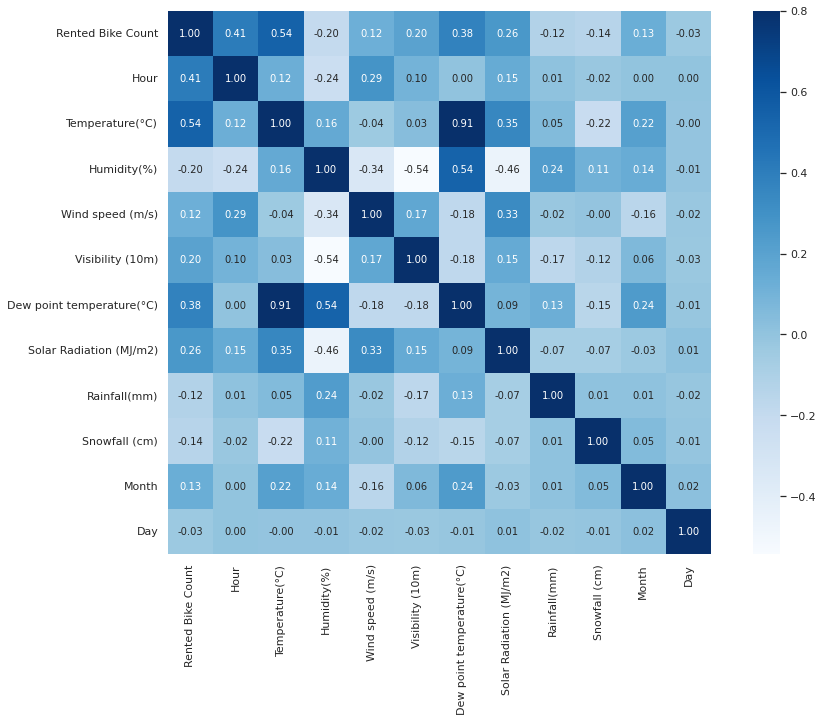

In [14]:
# Heatmap
corrmat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt='.2f',annot_kws={'size':10},vmax=.8,square=True,cmap="Blues");

We chose heatmap to display the relationship between the numerical variables. It is important to understand what all variables have what kind of says in deciding the number of bikes that will be rented on a particular hour of a day. And to visualise something like that, heatmaps are the best way.

From the heatmap, we understand that there is a strong positive correlation between temperature and due temperature. 

Moderate positive correlation exists between temperature and rented bike count, dew point temperature and rented bike count, hour and rented bike count, humidity and dew point temperature, solar radiation and wind speed, and solar radiation and temperature.

Moderate negative correlation exists between wind speed and humidity, visibility and humidity, and humidity and solar radiation.

Understanding what affects the number of bikes rented on a given hour will help predict the requirements early and thus make the bikes available and lessen the wait time.

####4.2 What is the distribution of the target variable Rented Bike Count?

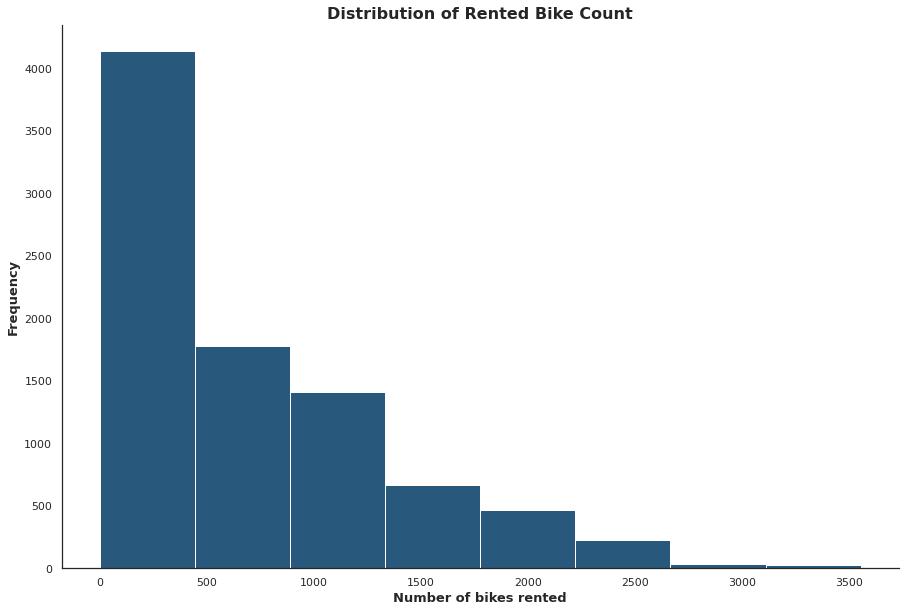

In [15]:
# Histogram plot
sns.set_style('white')
plt.figure(figsize = (15,10))
plt.hist(df['Rented Bike Count'],
         bins = 8,
         color = '#28587B')
plt.title('Distribution of Rented Bike Count', fontsize = 16, weight = "bold")
plt.xlabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [16]:
# Calculating the skewness of the Rented Bike Count variable
df['Rented Bike Count'].skew()

1.1534281773679014

We plotted the histogram to see how our target variable is distributed. A histogram tells us about the skewness and the distribution of a variable.

The Rented Bike Count variable is highly positively skewed. It measures 1.15 for skewness in the positive direction.

It is fairly expected that the distribution of the target variable will be somewhat like it is i.e. a lot of volume for the smaller numbers and the volume keeps on decreasing as and when we move towards higher numbers.

####4.3 What is the distribution of the count of bikes rented vs months?

In [17]:
# Preparing the data
bar_data = df.groupby('Month').agg({'Rented Bike Count':'sum'}).reset_index()
bar_data

Month  Rented Bike Count
0       1             150006
1       2             151833
2       3             380594
3       4             524227
4       5             707088
5       6             896887
6       7             734460
7       8             651887
8       9             673612
9      10             650675
10     11             465715
11     12             185330

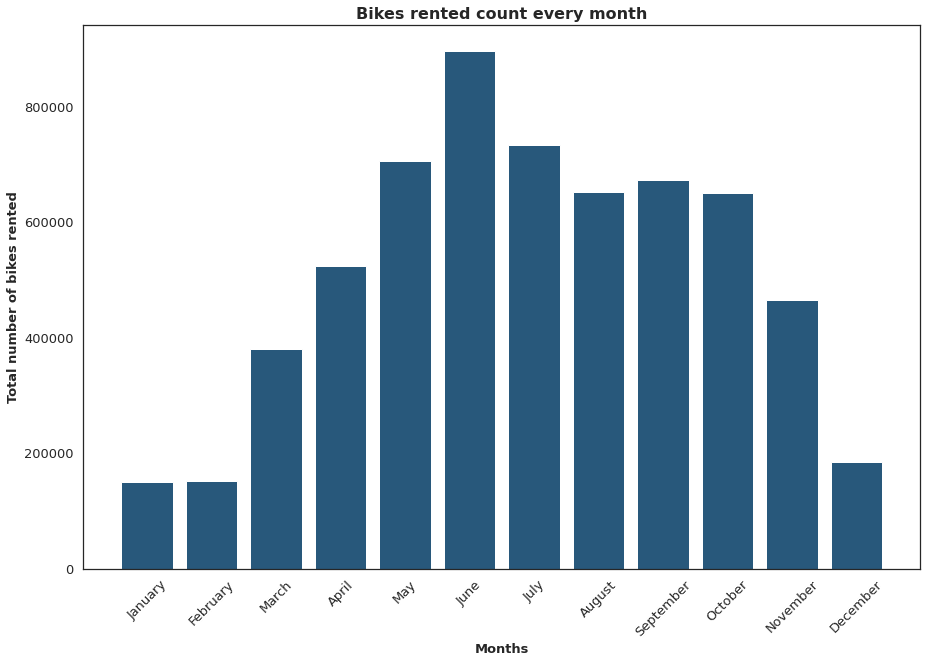

In [18]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Month'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks = bar_data['Month'], labels = months, rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Bikes rented count every month', fontsize = 16, fontweight = 'bold')
plt.xlabel('Months', fontsize = 13, fontweight = 'bold')
plt.ylabel('Total number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

Bar graphs are the most easiest way to represent a categorical and a numerical variable together. And they are quiet easy to interpret as well.

We can see that the months in the middle of the year have high bike rentals whereas they are far lesser at the beginning and at the end of the year.

June has the highest bike rentals of all the months.

####4.4 Distribution of the Rented Bike Count over days

In [19]:
# Preparing the data 
line_data = df.groupby('Date').agg({'Rented Bike Count':'sum'}).reset_index()
line_data

Date  Rented Bike Count
0    2017-12-01               9539
1    2017-12-02               8523
2    2017-12-03               7222
3    2017-12-04               8729
4    2017-12-05               8307
..          ...                ...
360  2018-11-26              17162
361  2018-11-27              16282
362  2018-11-28              16524
363  2018-11-29              16423
364  2018-11-30              16297

[365 rows x 2 columns]

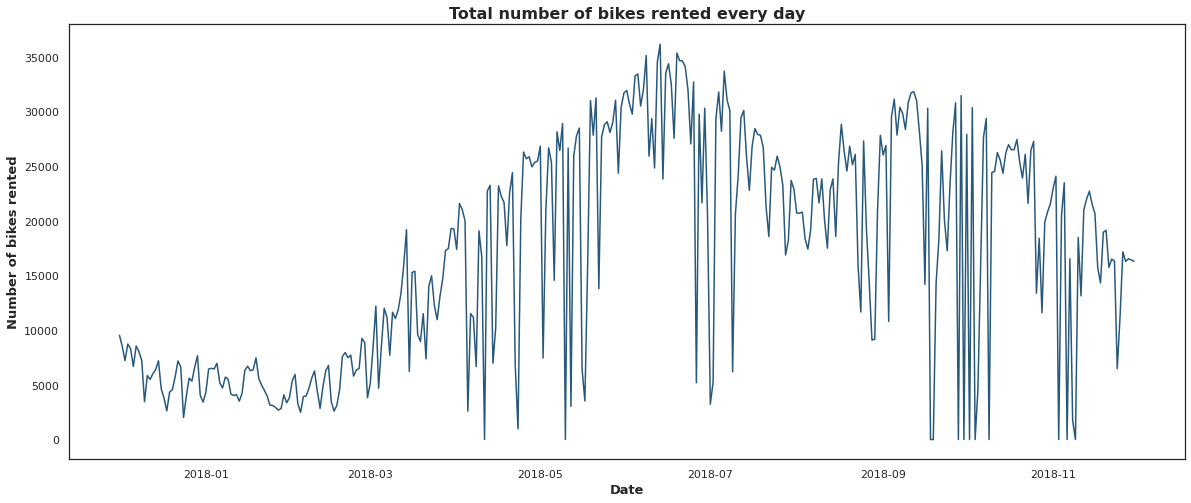

In [20]:
# Plotting the line graph
plt.figure(figsize = (20,8))
plt.plot(line_data['Date'], line_data['Rented Bike Count'], color = '#28587B')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Date', fontsize = 13, fontweight = 'bold')
plt.title('Total number of bikes rented every day', fontsize = 16, fontweight = "bold")
plt.show();

Line plots help understand the trends over time, like how we have in the case of the number of bikes rented over the 365 days of the year.

It looks like the first two months saw a bit of dip in the number of bikes rented before we saw a consistent growth which peaked in the month of June before the drop until August. Since August, there was again a growth until October after which it started going down again.

Also, the months of April, May, July, September, October and November experienced inconsistency in the number of the bikes rented on a day-to-day basis when compared with the rest of the months.

Knowing it explains which months experience more inconsistency and which doesn't and which ones have more demands and which don't. All these help get more information on the requirements of users.

####4.5 Which day of the week generally has more bikes rented?

In [21]:
# Preparing the data
# Finding out total number of bikes rented every day of the year
temp = df.groupby('Date').agg({'Day':'max','Rented Bike Count':'sum'}).reset_index() 
# Grouping by the day of the week and finding median
bar_data = temp.groupby('Day').agg({'Rented Bike Count':'median'}).reset_index() 
bar_data

Day  Rented Bike Count
0    0           19126.50
1    1           17911.50
2    2           19587.50
3    3           17590.00
4    4           18266.00
5    5           18380.50
6    6           14248.50

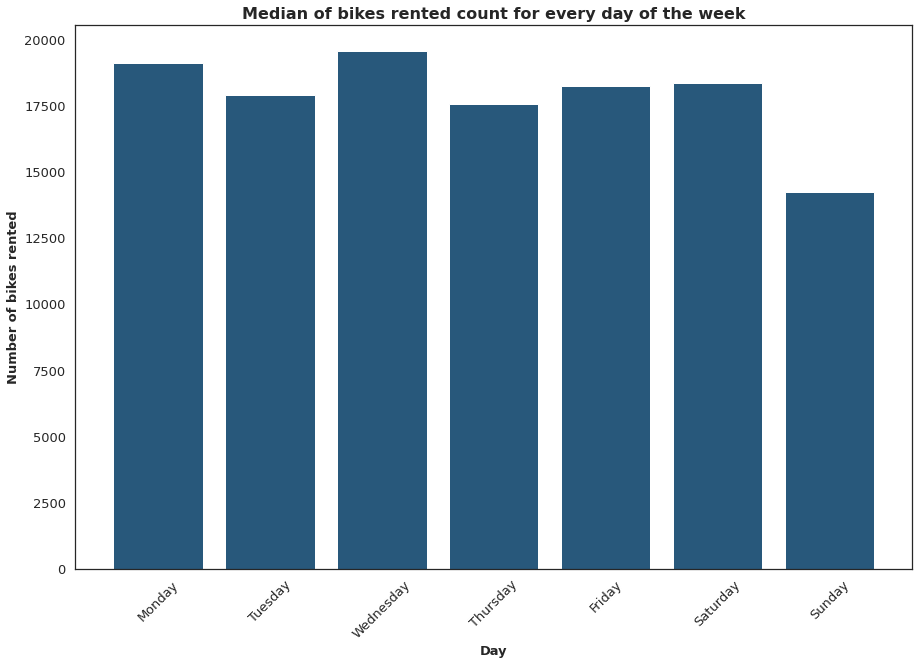

In [22]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Day'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
dayoftheweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks = bar_data['Day'], labels = dayoftheweek, rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Median of bikes rented count for every day of the week', fontsize = 16, fontweight = 'bold')
plt.xlabel('Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

Bar graph here helps us the most because they are easy to understand. 

Mondays and Wednesdays are the busiest whereas Sunday has the least requirement.

####4.6 When is the demand highest for bikes in terms of hour of the day?

In [23]:
# Preparing the data
bar_data = df.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
bar_data

Hour  Rented Bike Count
0      0             513.00
1      1             401.00
2      2             265.00
3      3             176.00
4      4             119.00
5      5             129.00
6      6             232.00
7      7             426.00
8      8             728.00
9      9             680.00
10    10             581.00
11    11             624.00
12    12             709.00
13    13             727.00
14    14             733.00
15    15             785.00
16    16             911.00
17    17            1184.00
18    18            1548.00
19    19            1224.00
20    20            1062.00
21    21            1046.00
22    22             949.00
23    23             656.00

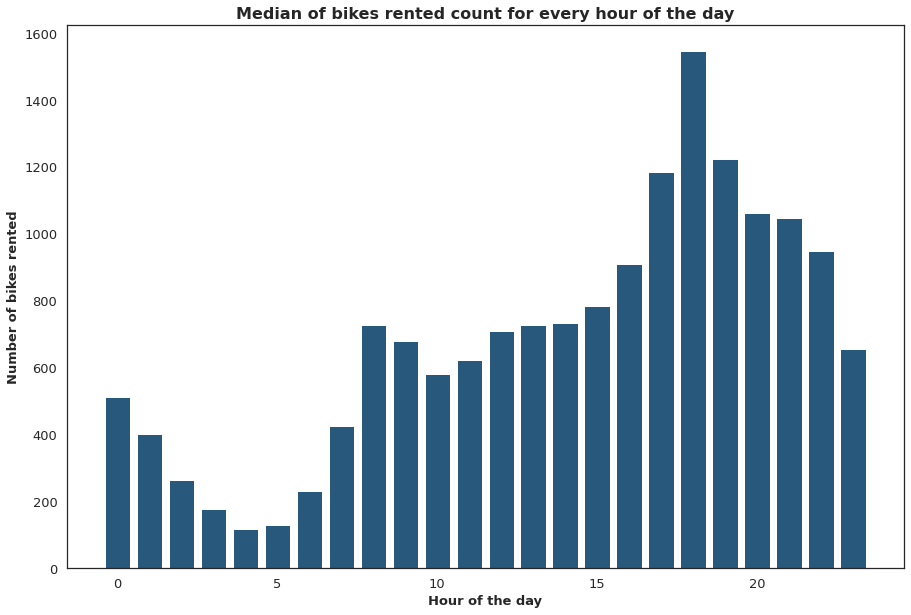

In [24]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Hour'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Median of bikes rented count for every hour of the day', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hour of the day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

The early morning hours have the lowest demands. However, after 07:00 hour, the demand grows and stays the same until 15:00 hour. Post 15:00, the demand grows at a rapid rate and see some of the busiest hours (16:00-22:00).

####4.7 How does the seasons affected the bike rental counts?

In [25]:
# Distribution of seasons among the months
df.groupby('Month').agg({'Seasons':'unique'})

Seasons
Month          
1      [Winter]
2      [Winter]
3      [Spring]
4      [Spring]
5      [Spring]
6      [Summer]
7      [Summer]
8      [Summer]
9      [Autumn]
10     [Autumn]
11     [Autumn]
12     [Winter]

In [26]:
# Preparing the data
temp = df.groupby(['Seasons','Date']).agg({'Rented Bike Count':'sum'}).reset_index() # Grouping by Seasons and Date 
bar_data = temp.groupby('Seasons').agg({'Rented Bike Count':'median'}).reset_index() # Grouping by Seasons
bar_data

Seasons  Rented Bike Count
0  Autumn           21545.00
1  Spring           17419.00
2  Summer           25571.50
3  Winter            5498.00

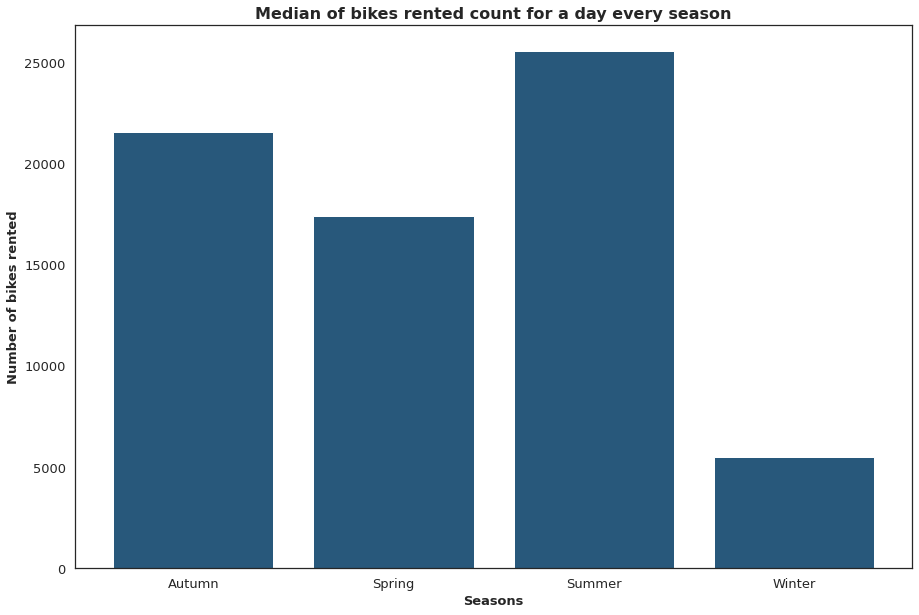

In [27]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['Seasons'], 
        height = bar_data['Rented Bike Count'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Median of bikes rented count for a day every season', fontsize = 16, fontweight = 'bold')
plt.xlabel('Seasons', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.show();

Winter starts from December and goes on till February. Then comes the season of Spring. It is spread from the month of March till May. After Spring is the season of Summer. Summer is between the months of June and August. Finally, the months of September, October and November have the season of Autumn.

Winter has very low requirements of bike sharing. Whereas, Summer has the highest. 

####4.8 How does the bike rental counts vary based on Holiday?

In [28]:
# Preparing the data
temp = df.groupby('Date')['Holiday'].max().reset_index()
pie_data = temp.Holiday.value_counts(normalize=True).reset_index()
pie_data

index  Holiday
0  No Holiday     0.95
1     Holiday     0.05

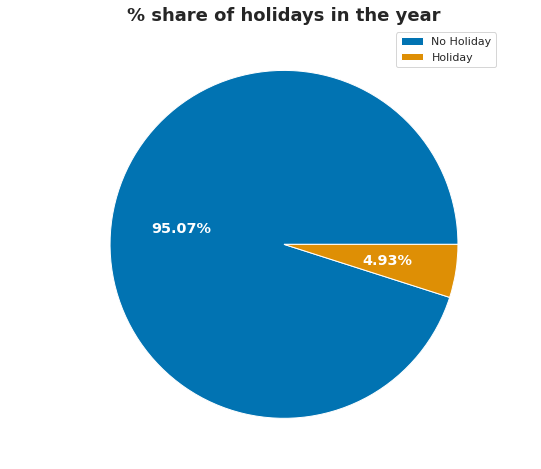

In [29]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Holiday'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of holidays in the year", fontweight = "bold", fontsize = 18)
plt.show();

In [30]:
# Preparing the data
# Segregating the two kinds
df_holiday = df[df['Holiday']=='Holiday']
df_NH = df[df['Holiday']=='No Holiday']
# Grouping by Hour for them
line_data = df_holiday.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp = df_NH.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=line_data, right=temp, on='Hour')
line_data.columns = ['Hour', 'Holiday', 'No Holiday']
line_data

Hour  Holiday  No Holiday
0      0   236.00      515.00
1      1   250.50      401.00
2      2   188.00      268.00
3      3   134.00      178.00
4      4    75.50      120.00
5      5    68.50      133.00
6      6    89.50      239.00
7      7   143.00      443.00
8      8   222.00      780.00
9      9   229.00      716.00
10    10   219.50      582.00
11    11   258.50      642.00
12    12   306.00      714.00
13    13   339.00      727.00
14    14   350.50      741.00
15    15   365.00      794.00
16    16   363.00      920.00
17    17   347.00     1221.00
18    18   277.00     1618.00
19    19   207.50     1260.00
20    20   226.00     1077.00
21    21   207.50     1069.00
22    22   183.00      983.00
23    23   208.50      658.00

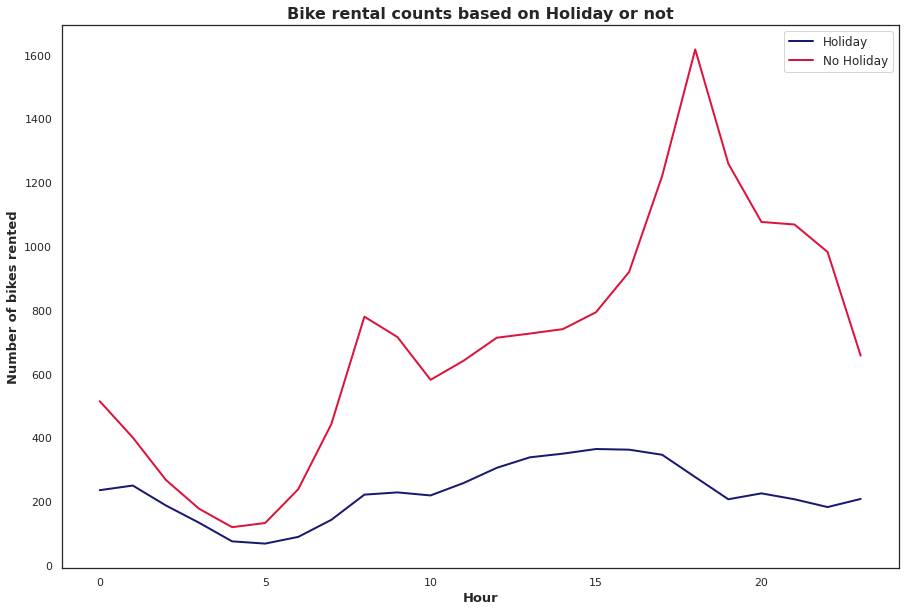

In [31]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Holiday'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Holiday'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Holiday','No Holiday']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Holiday or not', fontsize = 16, fontweight = "bold")
plt.show();

Pie charts are the best alternatives for bar graphs to show the distribution of a categorical variable in a dataset. 

And line plots help understand two numerical variables against a categorical variable in a clear and precise manner. Bar charts here would have been messy given the number of hours in a day (24) and stack charts would also have been difficult to understand the values and/or the distribution.

The dataset has 365 days of data, a year. And from the 365 days, only 18 days (4.93%) were holidays.

When it is a holiday, the bike rentals are very low, even during the supposed peak hours of the day during evening and night. 


####4.9 How many days were functional in the 365 days?

In [32]:
# Preparing the data
temp = df.groupby('Date')['Functioning Day'].max().reset_index()
pie_data = temp['Functioning Day'].value_counts(normalize=True).reset_index()
pie_data

index  Functioning Day
0   Yes             0.97
1    No             0.03

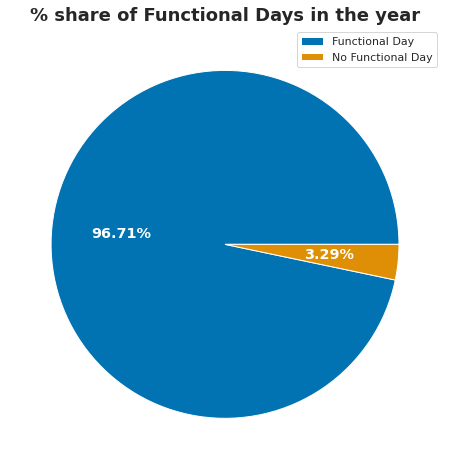

In [33]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Functioning Day'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend(labels = ['Functional Day', 'No Functional Day'])
# Giving our chart a suitable title
plt.title("% share of Functional Days in the year", fontweight = "bold", fontsize = 18)
plt.show();

There were 353 functional days (96.71%) in the 365 days of the dataset. Functional days are when the bike sharing and rental options are available.

####4.10 How does snowfall affect the bike rental count?

In [34]:
# Preparing the data
# Segregating the two kinds
snow_data = df[df['Snowfall (cm)']>0]
non_snow = df[df['Snowfall (cm)']==0]
# Grouping by Hour for them
temp = snow_data.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp1 = non_snow.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=temp, right=temp1, on='Hour')
line_data.columns = ['Hour', 'Snow', 'No Snow']
line_data

Hour   Snow  No Snow
0      0 100.00   544.50
1      1 120.00   421.50
2      2  75.00   283.00
3      3  55.00   186.50
4      4  37.00   126.50
5      5  41.50   140.00
6      6  76.50   255.00
7      7 165.00   464.00
8      8 375.50   786.00
9      9 206.50   725.00
10    10 144.00   609.50
11    11 168.00   656.00
12    12 185.50   751.00
13    13 198.00   758.00
14    14 185.50   762.00
15    15 193.00   817.50
16    16 211.00   939.00
17    17 231.50  1247.00
18    18 317.00  1641.00
19    19 205.00  1294.50
20    20 178.00  1154.00
21    21 165.00  1146.50
22    22 170.00  1013.00
23    23 130.00   679.00

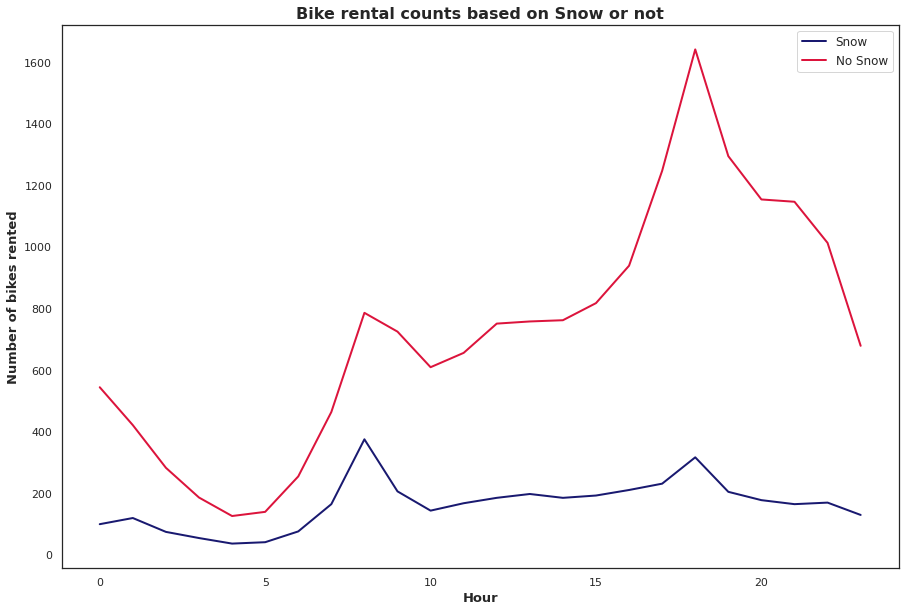

In [35]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Snow'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Snow'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Snow','No Snow']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Snow or not', fontsize = 16, fontweight = "bold")
plt.show();

The patterns of the bike rental counts when it snows is somewhat similar in shape and lower in volume to the one when it doesn't, without the massive growth experienced post noon. When it snows, the bike rentals stay somewhat close to 200 every hour.

####4.11 How does rainfall affect the bike rental count?

In [36]:
# Preparing the data
# Segregating the two kinds
rain_data = df[df['Rainfall(mm)']>0]
non_rain = df[df['Rainfall(mm)']==0]
# Grouping by Hour for them
temp = rain_data.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp1 = non_rain.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=temp, right=temp1, on='Hour')
line_data.columns = ['Hour', 'Rain', 'No Rain']
line_data

Hour   Rain  No Rain
0      0  76.00   558.00
1      1 130.00   420.00
2      2  76.00   283.00
3      3  60.00   199.50
4      4  36.50   124.00
5      5  49.50   137.00
6      6  46.00   261.00
7      7  94.00   447.00
8      8 169.50   783.00
9      9  65.50   757.00
10    10  78.00   592.00
11    11  52.00   644.00
12    12  66.50   751.00
13    13 149.00   755.50
14    14 147.00   764.50
15    15 122.00   838.00
16    16  48.50   928.00
17    17  65.00  1267.50
18    18 106.50  1707.00
19    19  73.00  1295.50
20    20  48.00  1169.00
21    21  82.00  1193.00
22    22  64.00  1013.00
23    23 123.50   678.00

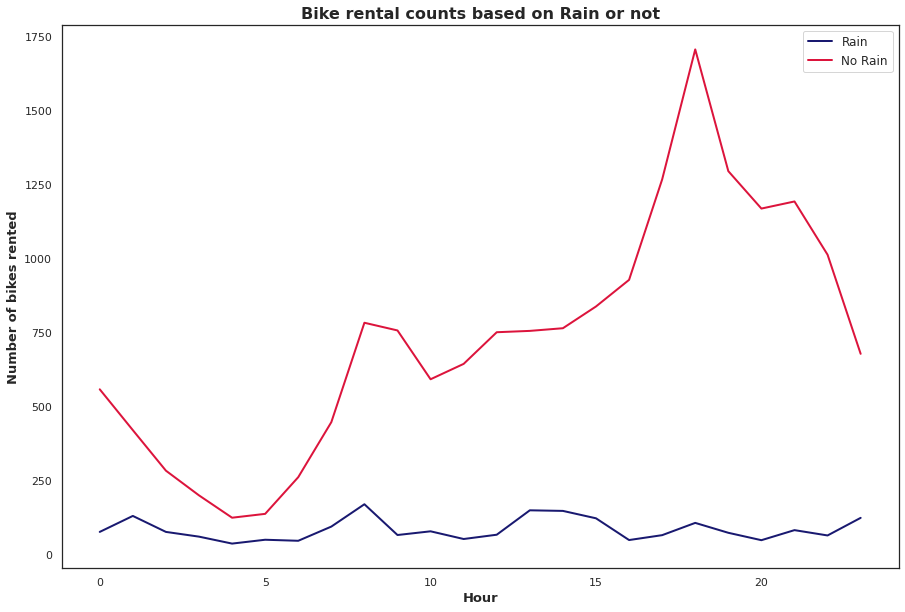

In [37]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Rain'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Rain'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Rain','No Rain']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Rain or not', fontsize = 16, fontweight = "bold")
plt.show();

Rainfall seems to have the most say on the bike rental counts. When it rains, the bike rental counts stay below 200 throughout the 24-hour cycle.


####4.12 How does solar radiation affect the bike rental counts?

In [38]:
# Preparing the data
# Segregating the two kinds
solar_data = df[df['Solar Radiation (MJ/m2)']>0]
non_solar = df[df['Solar Radiation (MJ/m2)']==0]
# Grouping by Hour for them
temp = solar_data.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
temp1 = non_solar.groupby('Hour').agg({'Rented Bike Count':'median'}).reset_index()
# Merging them
line_data = pd.merge(left=temp, right=temp1, on='Hour')
line_data.columns = ['Hour', 'Solar Radiation', 'No Solar Radiation']
line_data

Hour  Solar Radiation  No Solar Radiation
0      6           548.00              159.00
1      7           781.00              264.50
2      8           934.00              404.50
3      9           691.00               31.00
4     10           582.00               40.50
5     11           629.50              334.00
6     12           714.00              294.00
7     13           727.00              325.00
8     14           736.50              334.00
9     15           785.00              246.50
10    16           911.50              435.00
11    17          1209.00              160.00
12    18          1882.00              555.00
13    19          1753.00              404.50
14    20          1965.00              513.00

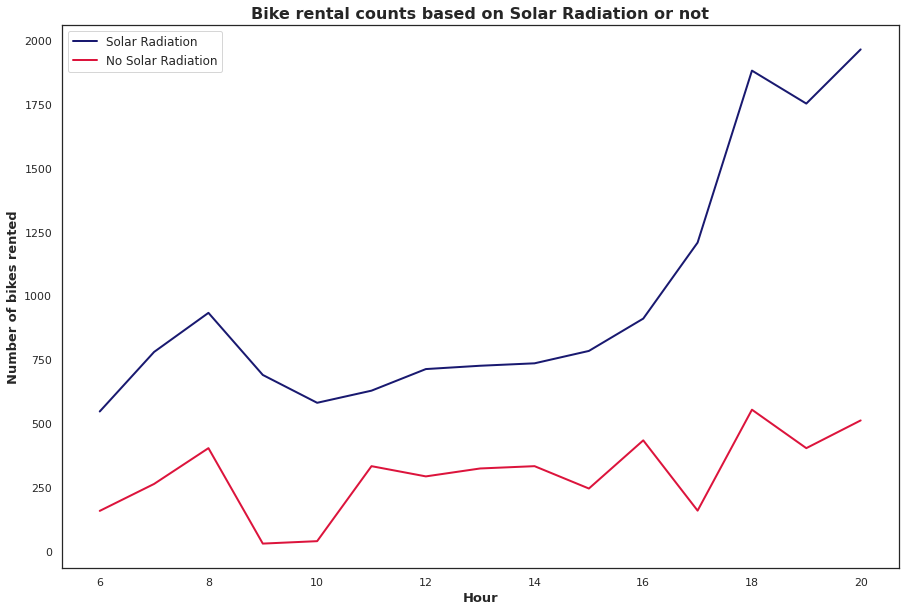

In [39]:
# Setting the size of the figure
plt.figure(figsize = (15,10))
# Plotting the lines
plt.plot(line_data['Hour'], line_data['Solar Radiation'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['Hour'], line_data['No Solar Radiation'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of bikes rented', fontsize = 13, fontweight = 'bold')
plt.xlabel('Hour', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Solar Radiation','No Solar Radiation']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Bike rental counts based on Solar Radiation or not', fontsize = 16, fontweight = "bold")
plt.show();

Solar Radiation is experienced only post 06:00 hour and before 20:00 hour. And it increases the bike rental counts to almost triple the numbers expected during a non-solar radiation timeline.


####4.13 Understanding the distributions and plotting to see correlation.

In [40]:
# Getting the numeric features for inspecting distributions
numeric_features = df.describe().columns

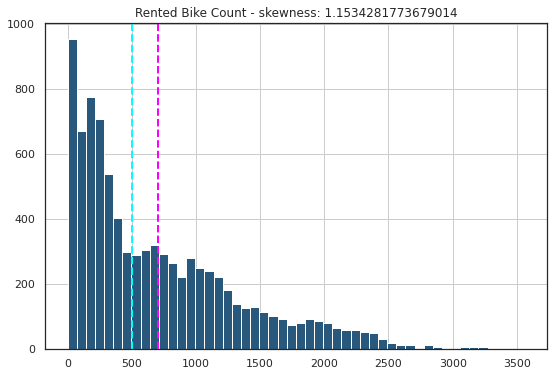

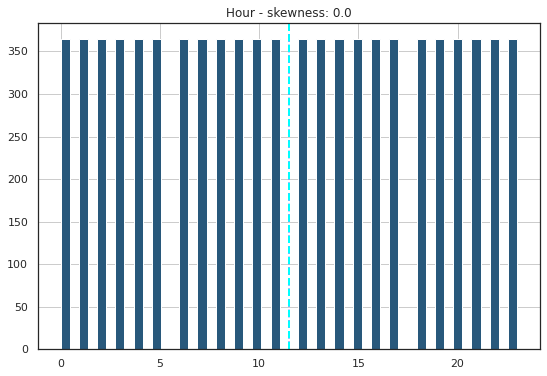

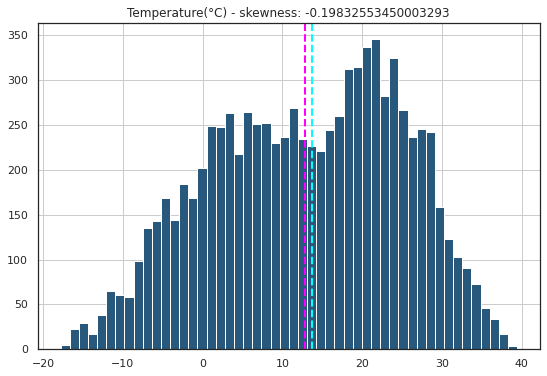

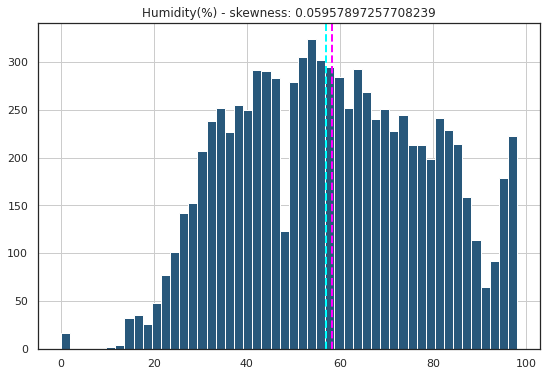

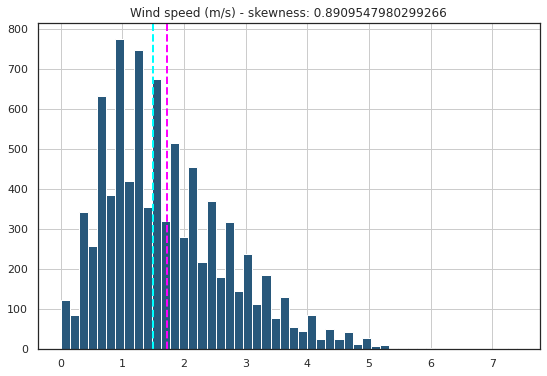

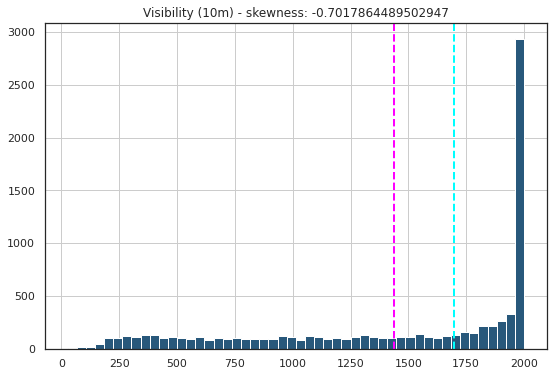

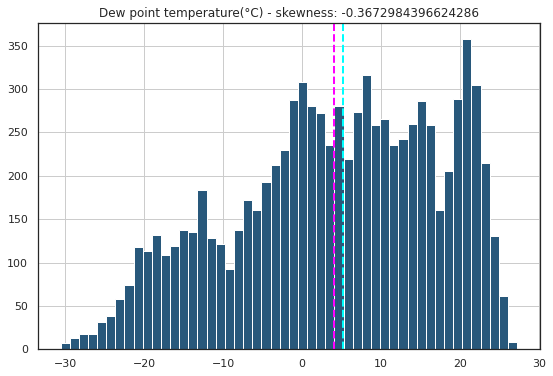

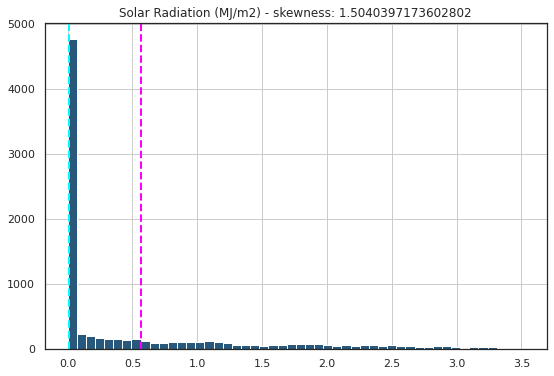

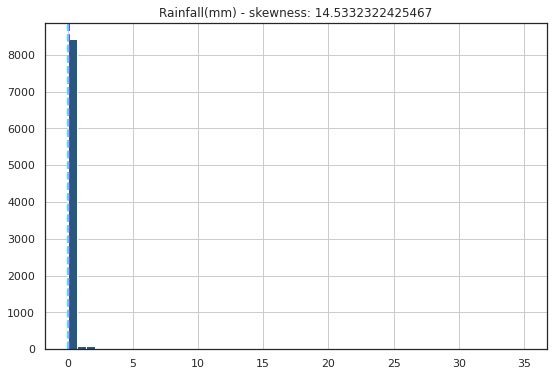

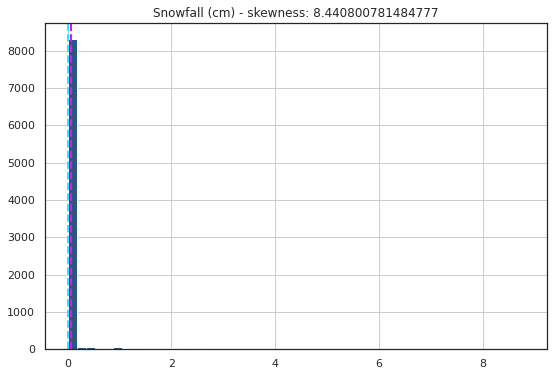

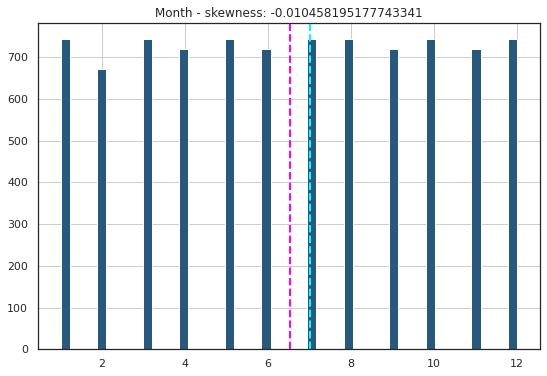

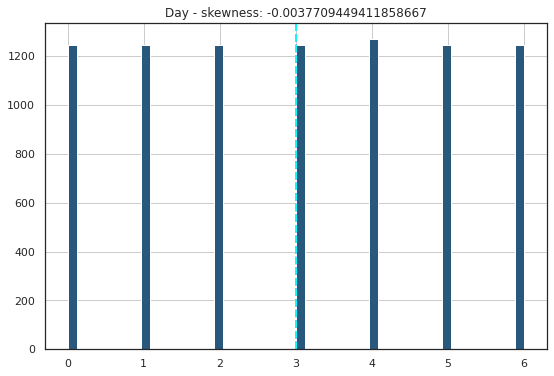

In [41]:
# plot a bar plot for each numerical feature count
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax, color = '#28587B')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col + ' - skewness: ' + str(df[col].skew()))
plt.show();

As discussed earlier, Bike rental count is a highly positively skewed target variable. Snowfall, rainfall and solar radiation are also highly positively skewed.

Temperature, humidity and dew point temperature are fairly symmetrical in shape.

Windspeed is moderately positively skewed whereas, visibility is moderatelt negatively skewed.

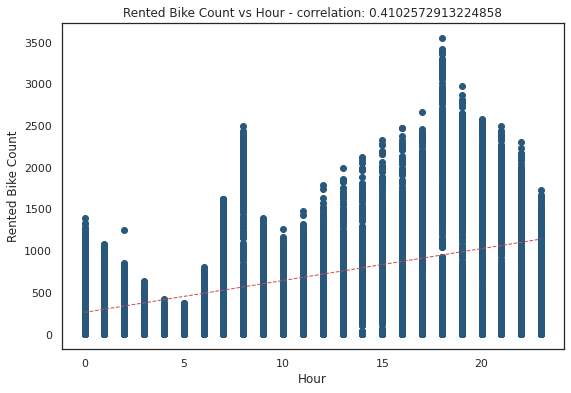

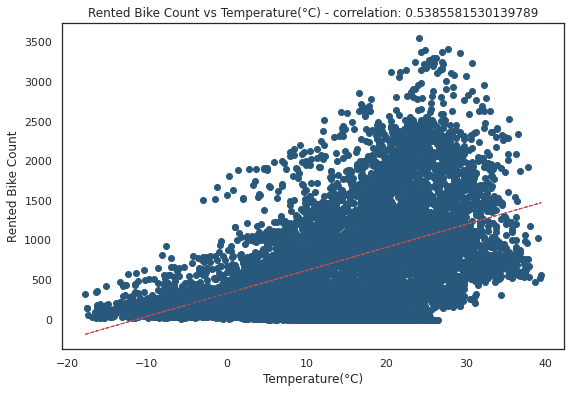

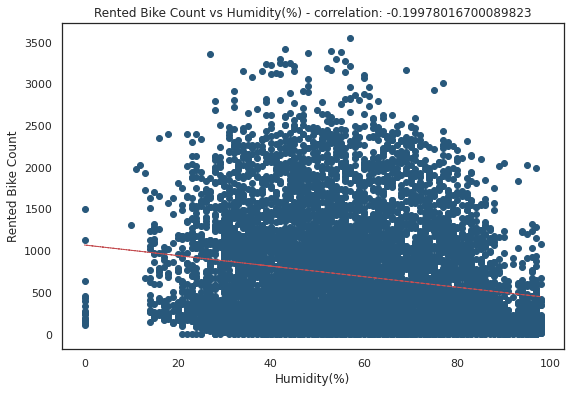

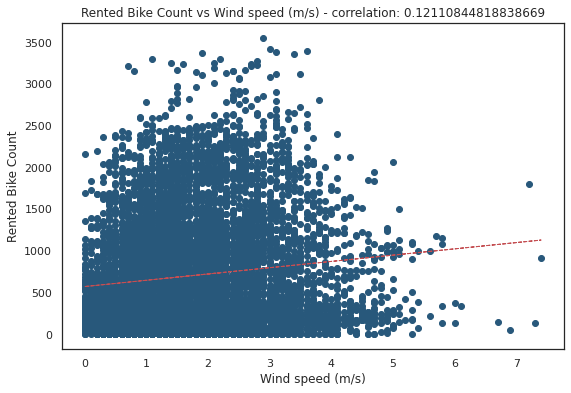

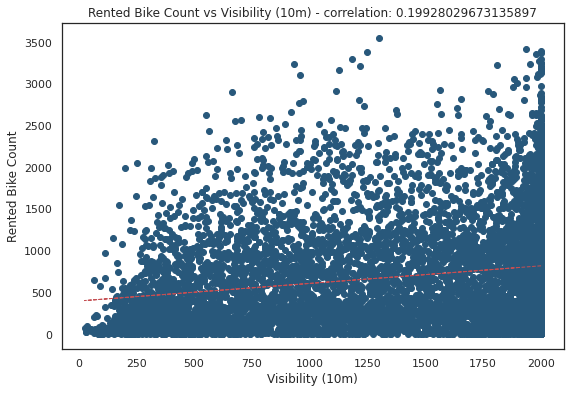

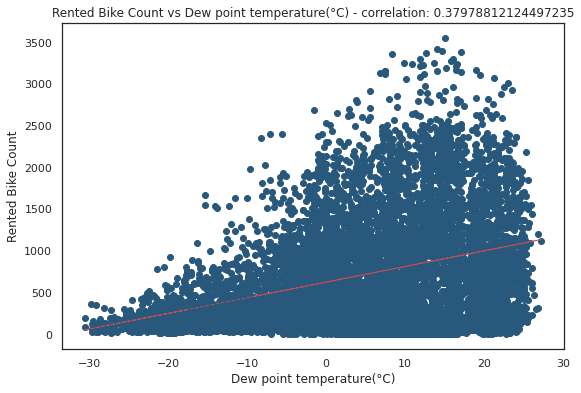

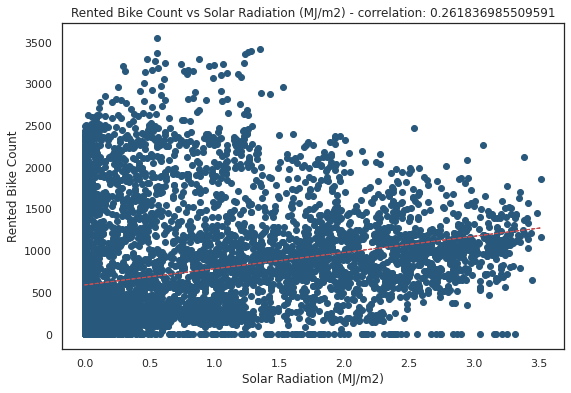

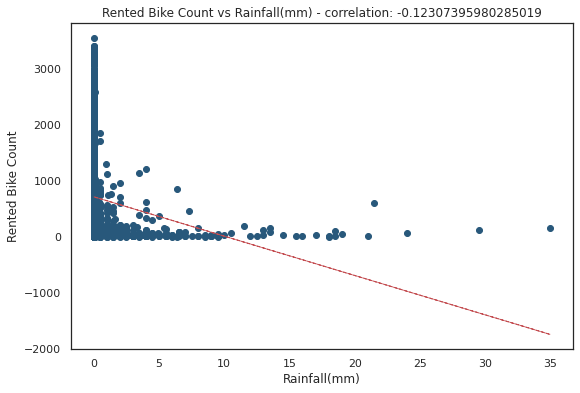

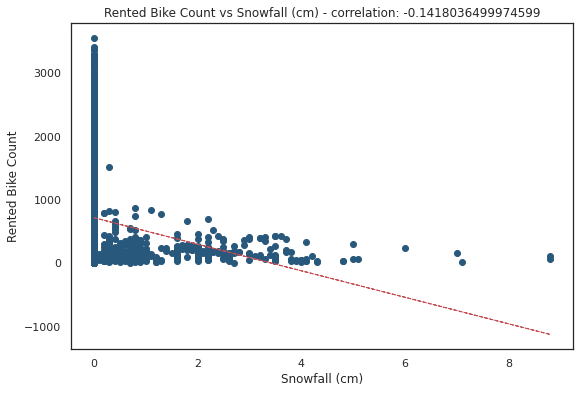

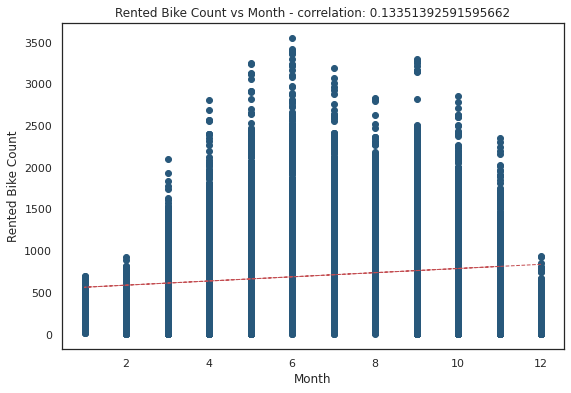

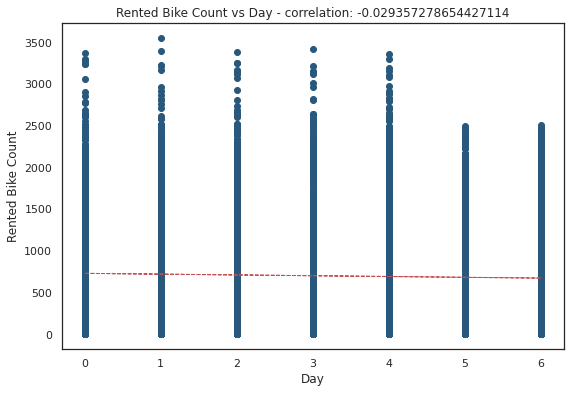

In [42]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='#28587B')
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + ' - correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show();

On plotting the scatter plots, none of the numeric variables show any kind of linear relationship with the target variable Rented Bike Count.

## ***5. Feature Engineering & Data Pre-processing***

In [43]:
df.rename(columns = {'Rented Bike Count':'BikeCount', 'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity',
                   'Wind speed (m/s)':'WindSpeed', 'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'DPT',
                   'Solar Radiation (MJ/m2)':'Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall',
                   'Functioning Day': 'Functioning'}, inplace = True)

###1. Handling missing values

Date           0
BikeCount      0
Hour           0
Temperature    0
Humidity       0
WindSpeed      0
Visibility     0
DPT            0
Radiation      0
Rainfall       0
Snowfall       0
Seasons        0
Holiday        0
Functioning    0
Month          0
Day            0
dtype: int64


<AxesSubplot:>

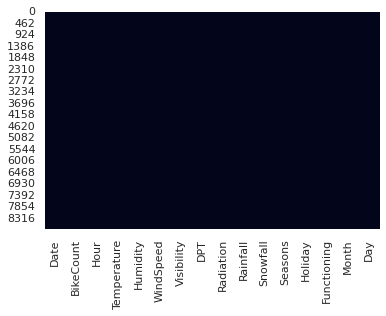

In [44]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

No missing values to work with in the dataset.

###2. Dealing with outliers

In [45]:
#Finding Outliers
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (3*iqr)
            fence_high = q3 + (3*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

Feature Number of Outliers
0     BikeCount                  0
1          Hour                  0
2   Temperature                  0
3      Humidity                  0
4     WindSpeed                  5
5    Visibility                  0
6           DPT                  0
7     Radiation                  0
8      Rainfall                528
9      Snowfall                443
10        Month                  0
11          Day                  0

In [46]:
df[df['Rainfall']>0]['Rainfall']

51     0.50
54     1.00
57     2.50
78     0.10
120    0.10
       ... 
8241   0.50
8520   0.20
8523   1.00
8601   9.10
8604   1.80
Name: Rainfall, Length: 528, dtype: float64

In [47]:
df[df['Snowfall']>0]['Snowfall']

120    0.10
121    0.30
122    0.40
123    0.40
124    0.40
       ... 
8645   0.30
8646   0.30
8647   0.30
8648   0.30
8649   0.20
Name: Snowfall, Length: 443, dtype: float64

We took the extreme boundaries because most of these are data that are meant to be skewed in distribution and the outliers reflect important anomalies. These outliers are important as they basically indicate days with rainfalls and snowfalls and hence, they should not be changed or deleted as we will start losing meaningful information from the dataset.

### 3. Categorical Encoding

In [48]:
df.columns

Index(['Date', 'BikeCount', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'DPT', 'Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning', 'Month', 'Day'],
      dtype='object')

In [49]:
# Encoding the values
dict1 = {'Holiday':0, 'No Holiday':1}
dict2 = {'No':0, 'Yes':1}
df['Holiday'] = df['Holiday'].map(dict1)
df['Functioning'] = df['Functioning'].map(dict2)
df

Date  BikeCount  Hour  Temperature  Humidity  WindSpeed  \
0     2017-12-01        254     0        -5.20        37       2.20   
1     2017-12-01        204     1        -5.50        38       0.80   
2     2017-12-01        173     2        -6.00        39       1.00   
3     2017-12-01        107     3        -6.20        40       0.90   
4     2017-12-01         78     4        -6.00        36       2.30   
...          ...        ...   ...          ...       ...        ...   
8755  2018-11-30       1003    19         4.20        34       2.60   
8756  2018-11-30        764    20         3.40        37       2.30   
8757  2018-11-30        694    21         2.60        39       0.30   
8758  2018-11-30        712    22         2.10        41       1.00   
8759  2018-11-30        584    23         1.90        43       1.30   

      Visibility    DPT  Radiation  Rainfall  Snowfall Seasons  Holiday  \
0           2000 -17.60       0.00      0.00      0.00  Winter        1   
1           2000 -17.60       0.00      0.00      0.00  Winter        1   
2           2000 -17.70       0.00      0.00      0.00  Winter        1   
3           2000 -17.60       0.00      0.00      0.00  Winter        1   
4           2000 -18.60       0.00      0.00      0.00  Winter        1   
...          ...    ...        ...       ...       ...     ...      ...   
8755        1894 -10.30       0.00      0.00      0.00  Autumn        1   
8756        2000  -9.90       0.00      0.00      0.00  Autumn        1   
8757        1968  -9.90       0.00      0.00      0.00  Autumn        1   
8758        1859  -9.80       0.00      0.00      0.00  Autumn        1   
8759        1909  -9.30       0.00      0.00      0.00  Autumn        1   

      Functioning  Month  Day  
0               1     12    4  
1               1     12    4  
2               1     12    4  
3               1     12    4  
4               1     12    4  
...           ...    ...  ...  
8755            1     11    4  
8756            1     11    4  
8757            1     11    4  
8758            1     11    4  
8759            1     11    4  

[8760 rows x 16 columns]

In [50]:
# One hot encoding
df = pd.get_dummies(df, columns = ['Hour', 'Seasons', 'Month', 'Day'])
df

Date  BikeCount  Temperature  Humidity  WindSpeed  Visibility  \
0     2017-12-01        254        -5.20        37       2.20        2000   
1     2017-12-01        204        -5.50        38       0.80        2000   
2     2017-12-01        173        -6.00        39       1.00        2000   
3     2017-12-01        107        -6.20        40       0.90        2000   
4     2017-12-01         78        -6.00        36       2.30        2000   
...          ...        ...          ...       ...        ...         ...   
8755  2018-11-30       1003         4.20        34       2.60        1894   
8756  2018-11-30        764         3.40        37       2.30        2000   
8757  2018-11-30        694         2.60        39       0.30        1968   
8758  2018-11-30        712         2.10        41       1.00        1859   
8759  2018-11-30        584         1.90        43       1.30        1909   

        DPT  Radiation  Rainfall  Snowfall  ...  Month_10  Month_11  Month_12  \
0    -17.60       0.00      0.00      0.00  ...         0         0         1   
1    -17.60       0.00      0.00      0.00  ...         0         0         1   
2    -17.70       0.00      0.00      0.00  ...         0         0         1   
3    -17.60       0.00      0.00      0.00  ...         0         0         1   
4    -18.60       0.00      0.00      0.00  ...         0         0         1   
...     ...        ...       ...       ...  ...       ...       ...       ...   
8755 -10.30       0.00      0.00      0.00  ...         0         1         0   
8756  -9.90       0.00      0.00      0.00  ...         0         1         0   
8757  -9.90       0.00      0.00      0.00  ...         0         1         0   
8758  -9.80       0.00      0.00      0.00  ...         0         1         0   
8759  -9.30       0.00      0.00      0.00  ...         0         1         0   

      Day_0  Day_1  Day_2  Day_3  Day_4  Day_5  Day_6  
0         0      0      0      0      1      0      0  
1         0      0      0      0      1      0      0  
2         0      0      0      0      1      0      0  
3         0      0      0      0      1      0      0  
4         0      0      0      0      1      0      0  
...     ...    ...    ...    ...    ...    ...    ...  
8755      0      0      0      0      1      0      0  
8756      0      0      0      0      1      0      0  
8757      0      0      0      0      1      0      0  
8758      0      0      0      0      1      0      0  
8759      0      0      0      0      1      0      0  

[8760 rows x 59 columns]

We did label encoding for the columns that had Yes/No as the only options with Yes getting replaced by 1 and No getting replaced by 0. This way we have given a meaning to 1 and 0 as they check if the days were functional or not and if they were a holiday or not.

And we have one hot encoded the variables we thought should not have one column with multiple numerical values as it may have generated bias for the categories specified with higher values.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [51]:
df.columns

Index(['Date', 'BikeCount', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'DPT', 'Radiation', 'Rainfall', 'Snowfall', 'Holiday',
       'Functioning', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6'],
      dtype='object')

We have already created two new features which we believe will be useful for us in the predictive model. The two new features are the Month and Day of the week columns, extracted from the Date column.

#### 2. Feature Selection

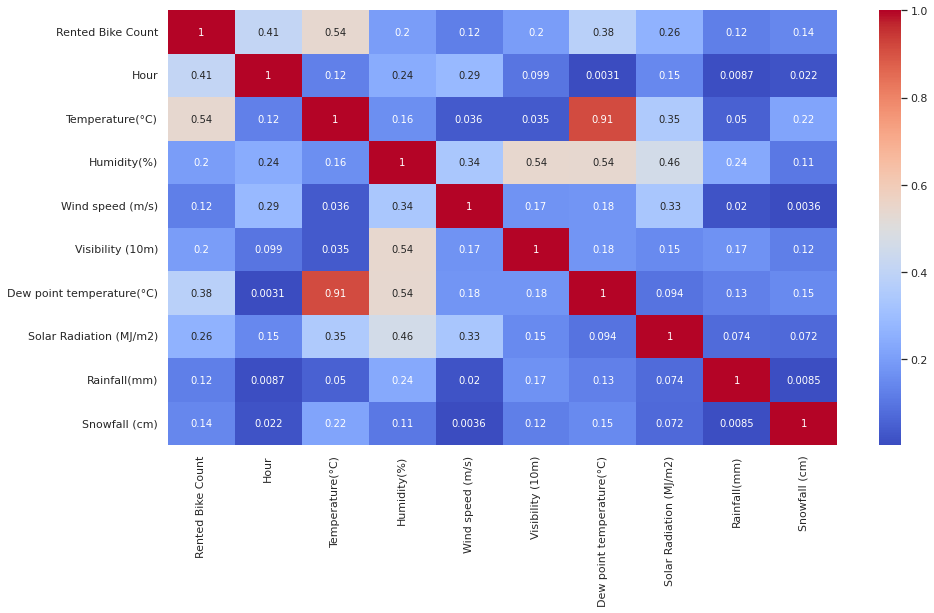

In [52]:
# Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show();

In [53]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
numerical_col = ['Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'DPT', 'Radiation', 'Snowfall']

In [55]:
# VIF values
calc_vif(df[[i for i in numerical_col if i not in ['Date','BikeCount']]])

variables   VIF
0  Temperature 29.06
1     Humidity  4.92
2    WindSpeed  4.51
3   Visibility  8.98
4          DPT 15.18
5    Radiation  2.82
6     Snowfall  1.12

In [56]:
# VIF without DPT
calc_vif(df[[i for i in numerical_col if i not in ['Date','BikeCount','DPT']]])

variables  VIF
0  Temperature 3.16
1     Humidity 4.59
2    WindSpeed 4.07
3   Visibility 4.29
4    Radiation 2.25
5     Snowfall 1.12

In [57]:
# Creating the dataframe and implementing the changes
X = df.copy()
y = X['BikeCount']
X.drop(columns=['Date', 'BikeCount', 'DPT'], inplace=True)

We had already established that there were some highly correlated numerical variables in our dataset. And so, we decided to eliminate the multicollinearity through the use of Pearson's Correlation Coefficient and the Variance Inflation Factors. 

DPT i.e. Dew point temperature is highly correlated with temperature, unsurprisingly. And so, VIF has a very high value for it and we decided to remove it. That helped us bring the VIF values for the rest of the numerical columns down under 5.

There are still columns like Humidity and Visibility that have variance in excess of 300% than what it would generally have if the variables weren't correlated. In an ideal world, we would want to bring these down to as low as possible. However, the general practice is to go ahead if the VIF values are lesser than 5. And so, we have decided to keep those variables.

### 5. Data Transformation and Scaling

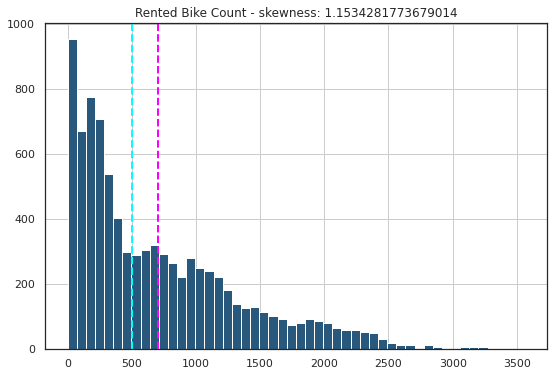

In [58]:
plt.figure(figsize=(9,6))
feature = y
feature.hist(bins=50, color = '#28587B')
plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.title('Rented Bike Count - skewness: ' + str(y.skew()))
plt.show();

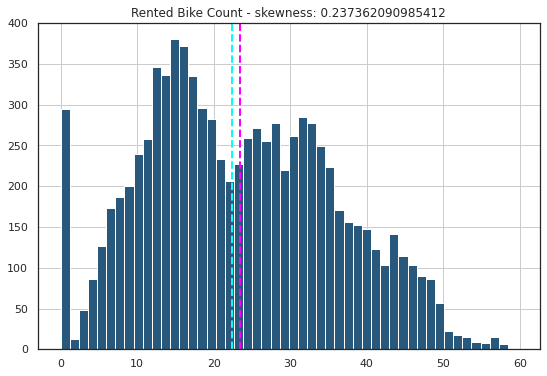

In [59]:
y = y**0.5
plt.figure(figsize=(9,6))
feature = y
feature.hist(bins=50, color = '#28587B')
plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.title('Rented Bike Count - skewness: ' + str(y.skew()))
plt.show();

In [60]:
numerical_features = ['Temperature','Humidity','WindSpeed','Visibility','Radiation','Rainfall','Snowfall']
X[numerical_features] = X[numerical_features].apply(zscore)

We have combined the process of transformation and scaling. For transformation, since we figured out that the distribution of the target variable isn't gaussian-like distribution, we applied the square-root transformation on it to make it more normal like and bring the skewness value down from a highly positively skewed number to a moderately positively skewed number.

For scaling, we have applied the z-score to standardise the values which makes the mean 0 and standard deviation 1 for the variables.

###6. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6132, 56)
Number transactions y_train dataset:  (6132,)
Number transactions X_test dataset:  (2628, 56)
Number transactions y_test dataset:  (2628,)


We have used the 70-30 split for the dataset to ensure that there are enough values in the train set. 



## ***6. ML Model Implementation***

Before we begin the model building phase, we would like to set a single metric that we will be using to judge our models. And that metric is going to be the R2 score.

R2 scores are basically how much variance of the target variable the models are able to explain. So, obviously the higher the R2 value, the better the model.

The formula for R2 score is:

R2 = 1 - (Sum of squares of residuals/Total sum of squared errors)

Sum of squared of residuals = (y_pred - y_test)**2

Total sum of squared erros = (y - y_mean)**2

### ML Model - 1 - **Implementing Baseline Model**

In [62]:
reg = LinearRegression().fit(X_train, y_train)

In [63]:
reg.score(X_train, y_train)

0.7754871450445212

In [64]:
#feature importance
reg.coef_

array([ 6.08755471e+00, -2.66472657e+00, -5.56809002e-02,  6.07826195e-01,
        6.92026716e-01, -1.67968762e+00, -2.87681601e-02,  3.53561377e+00,
        2.84424332e+01, -4.53924211e+11, -4.53924211e+11, -4.53924211e+11,
       -4.53924211e+11, -4.53924211e+11, -4.53924211e+11, -4.53924211e+11,
       -4.53924211e+11, -4.53924211e+11, -4.53924211e+11, -4.53924211e+11,
       -4.53924211e+11, -4.53924211e+11, -4.53924211e+11, -4.53924211e+11,
       -4.53924211e+11, -4.53924211e+11, -4.53924211e+11, -4.53924211e+11,
       -4.53924211e+11, -4.53924211e+11, -4.53924211e+11, -4.53924211e+11,
       -4.53924211e+11, -1.97726013e+12,  1.30808279e+12,  2.32966875e+12,
        2.34108010e+12, -1.13457427e+12, -1.13457427e+12, -1.01576963e+11,
       -1.01576963e+11, -1.01576963e+11, -1.12316292e+12, -1.12316292e+12,
       -1.12316292e+12,  3.18376595e+12,  3.18376595e+12,  3.18376595e+12,
       -1.13457427e+12,  3.88651911e+10,  3.88651911e+10,  3.88651911e+10,
        3.88651911e+10,  

In [65]:
y_pred = reg.predict(X_test)

In [66]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 98385.79875456648
RMSE : 313.6651060519268


In [67]:
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adj_r2)

R2 : 0.7588232748638691
Adjusted R2 :  0.7535701062105734


In [68]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = pd.DataFrame(dict1,index=[0])

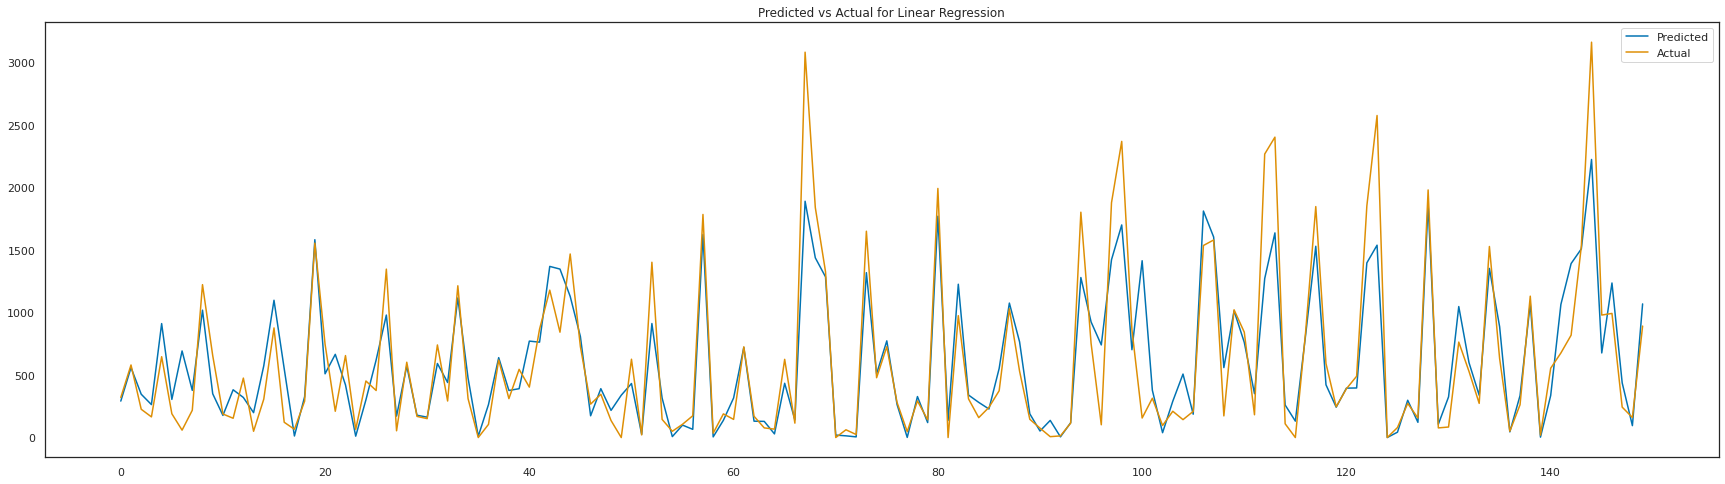

In [69]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Linear Regression')
plt.show();

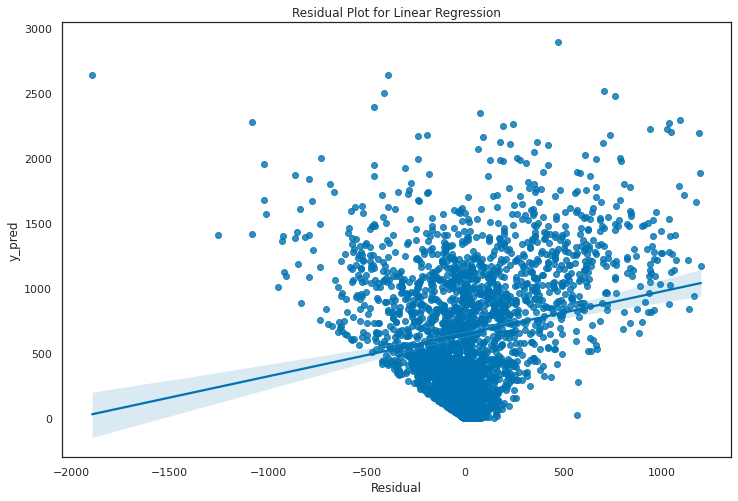

In [70]:
residual = y_test**2 - y_pred**2
plt.figure(figsize=(12,8))
sns.regplot(residual,y_pred**2)
plt.xlabel('Residual')
plt.ylabel('y_pred')
plt.title('Residual Plot for Linear Regression')
plt.show();

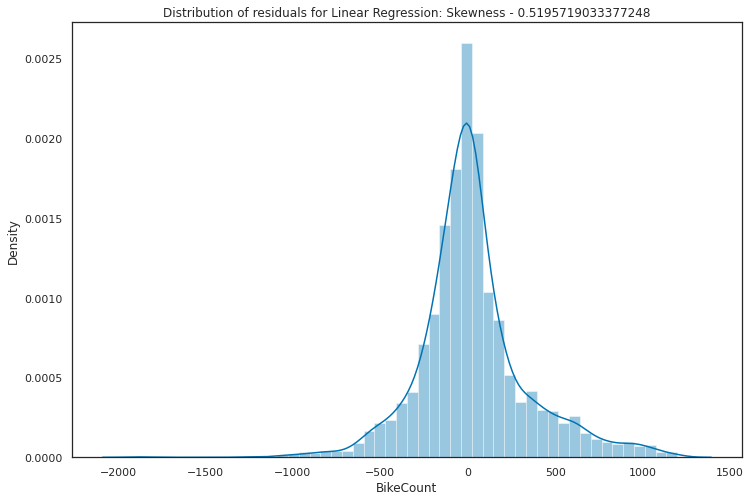

In [71]:
plt.figure(figsize=(12,8))
sns.distplot(residual)
plt.title('Distribution of residuals for Linear Regression: Skewness - ' + str(residual.skew()))
plt.show();

The linear regression baseline model does well to cover a bit more than 75% of the variance in the target variable. It doesn't overfit or underfit as we have seen from the R2 values for the train and test sets.

It gives a lot of importance to the categorical features. Hours, Seasons, Month, Functional Day and Holiday have a lot more say than the numerical features like Temperature, Humidity and Visibility.

### ML Model - 2 - **Implementing Lasso Model**

In [72]:
lasso = Lasso(alpha=0.01, max_iter=3000).fit(X_train, y_train)

In [73]:
lasso.score(X_train, y_train)

0.7747674583630697

In [74]:
#feature importance numbers
lasso.coef_

array([ 6.04220888e+00, -2.76758386e+00, -7.00935120e-03,  5.59137499e-01,
        3.56410220e-01, -1.68186988e+00, -7.57524177e-03,  3.30944997e+00,
        2.80317711e+01,  0.00000000e+00, -1.77904553e+00, -4.53802366e+00,
       -6.87846602e+00, -8.98874687e+00, -8.49612983e+00, -3.57025479e+00,
        2.35983169e+00,  7.63881352e+00,  1.41740369e+00, -2.33238555e+00,
       -2.56457628e+00, -1.73785392e+00, -1.78338529e+00, -2.16252765e+00,
       -1.05047004e+00,  5.79311738e-01,  3.87797618e+00,  1.01889003e+01,
        6.67514811e+00,  5.79757009e+00,  6.18121088e+00,  4.83815929e+00,
        1.22054639e+00,  4.53196210e+00,  1.08878739e+00, -0.00000000e+00,
       -2.33769070e+00, -2.97270631e-01, -9.54143022e-01, -6.50456650e-01,
        0.00000000e+00,  2.64877160e+00,  5.51520298e+00, -0.00000000e+00,
       -2.60819658e+00, -1.34163588e+00,  9.80482922e-01,  1.94073638e-01,
        1.47304802e+00, -5.74363152e-01,  1.04256499e-01,  2.13924824e-01,
       -0.00000000e+00,  

In [75]:
y_pred = lasso.predict(X_test)

In [76]:
print("For Lasso Regression without Hyperparameter tuning:")
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Lasso Regression without Hyperparameter tuning:
MSE : 100410.64882952604
RMSE : 316.87639361354456
R2 : 0.7538596854418975
Adjusted R2 :  0.7484984028221955


In [77]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -35.71732028957938


In [78]:
y_pred = lasso_regressor.predict(X_test)

In [79]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Lasso Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

For Lasso Regression with Hyperparameter tuning:
MSE : 98403.59727358364
RMSE : 313.69347661942805
R2 : 0.7587796446999311
Adjusted R2 :  0.7535255257202329


In [80]:
lasso = Lasso()
parameters = {'alpha': [0.00005, 0.00007, 0.00009, 0.0001, 0.00012, 0.00015, 0.00016, 0.00017, 0.00018, 0.0002, 0.00023, 0.00025, 0.00027]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 7e-05, 9e-05, 0.0001, 0.00012,
                                   0.00015, 0.00016, 0.00017, 0.00018, 0.0002,
                                   0.00023, 0.00025, 0.00027]},
             scoring='neg_mean_squared_error')

The best fit alpha value is found out to be : {'alpha': 0.00017}

Using  {'alpha': 0.00017}  the negative mean squared error is:  -35.71644394283838


In [81]:
y_pred = lasso_regressor.predict(X_test)

In [82]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Lasso Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Lasso Regression with Hyperparameter tuning:
MSE : 98418.57906735971
RMSE : 313.717355381177
R2 : 0.7587429192781191
Adjusted R2 :  0.7534880003670241


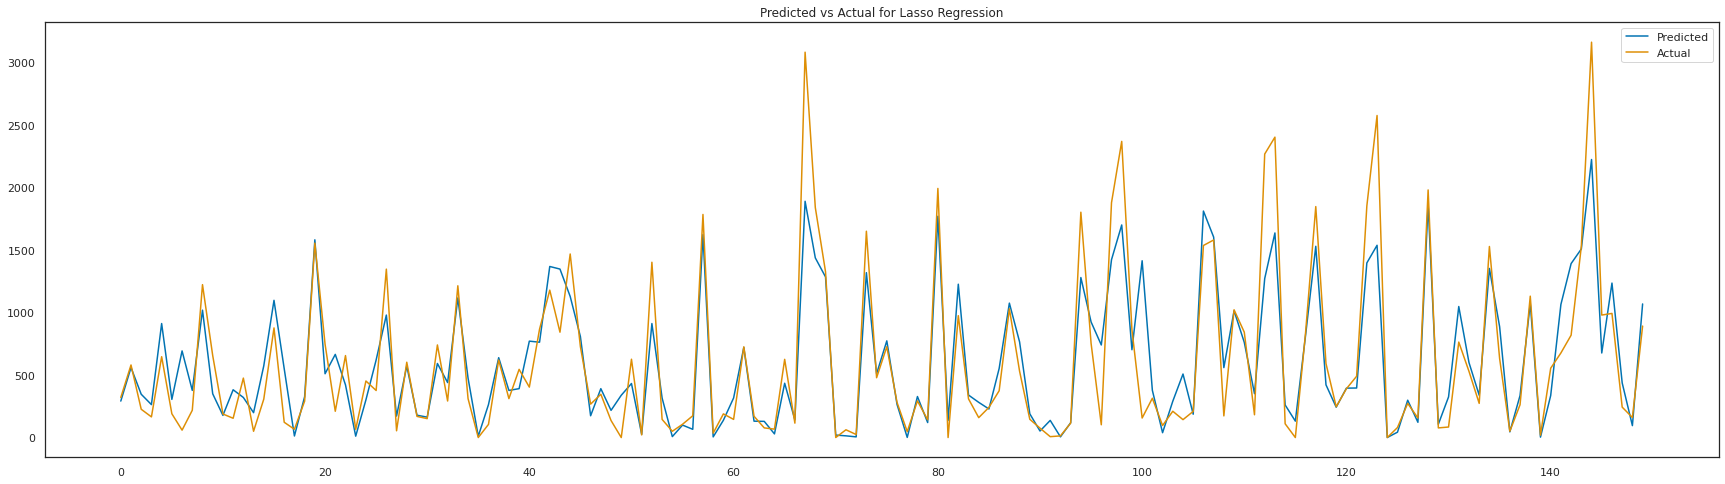

In [83]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Lasso Regression')
plt.show();

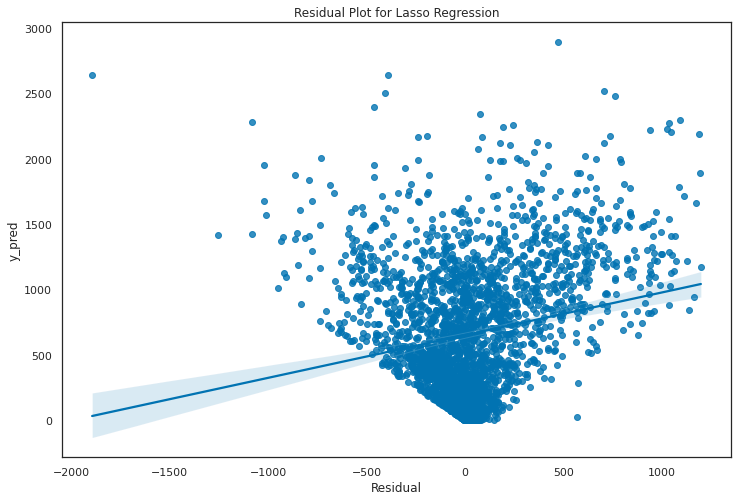

In [84]:
residual = y_test**2 - y_pred**2
plt.figure(figsize=(12,8))
sns.regplot(residual,y_pred**2)
plt.xlabel('Residual')
plt.ylabel('y_pred')
plt.title('Residual Plot for Lasso Regression')
plt.show();

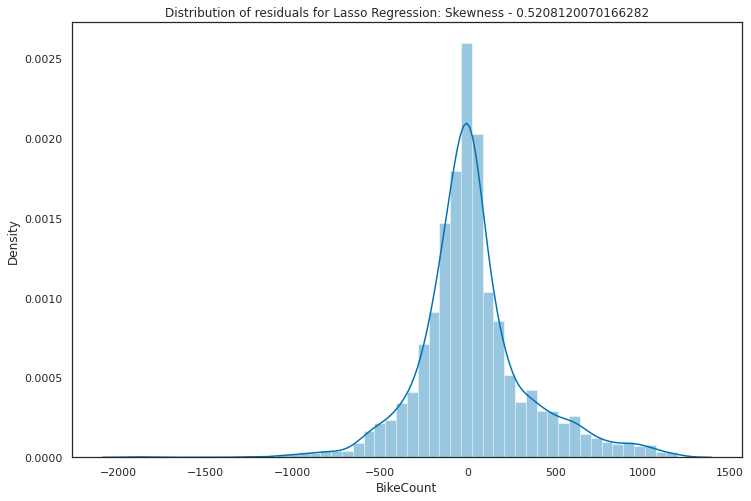

In [85]:
plt.figure(figsize=(12,8))
sns.distplot(residual)
plt.title('Distribution of residuals for Lasso Regression: Skewness - ' + str(residual.skew()))
plt.show();

In [86]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict2,ignore_index=True)

The Lasso regression model doesn't significantly do much better or worse than the baseline regression model. Even when we used the Hyperparameter tuning methods, the performance could not be bettered. So, they also covered approximately 75% of the target variable's variance.

As for the feature important aspect of the model - temperature and some of the hour variables have the most say while a few of them have been eliminated from the model through its feature selection method.

### ML Model - 3 - **Implementing Ridge Model**


In [87]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -35.63392084958591


In [88]:
y_pred = ridge_regressor.predict(X_test)

In [89]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Ridge Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Ridge Regression with Hyperparameter tuning:
MSE : 98623.82247296136
RMSE : 314.044300175885
R2 : 0.7582397985732471
Adjusted R2 :  0.7529739209847996


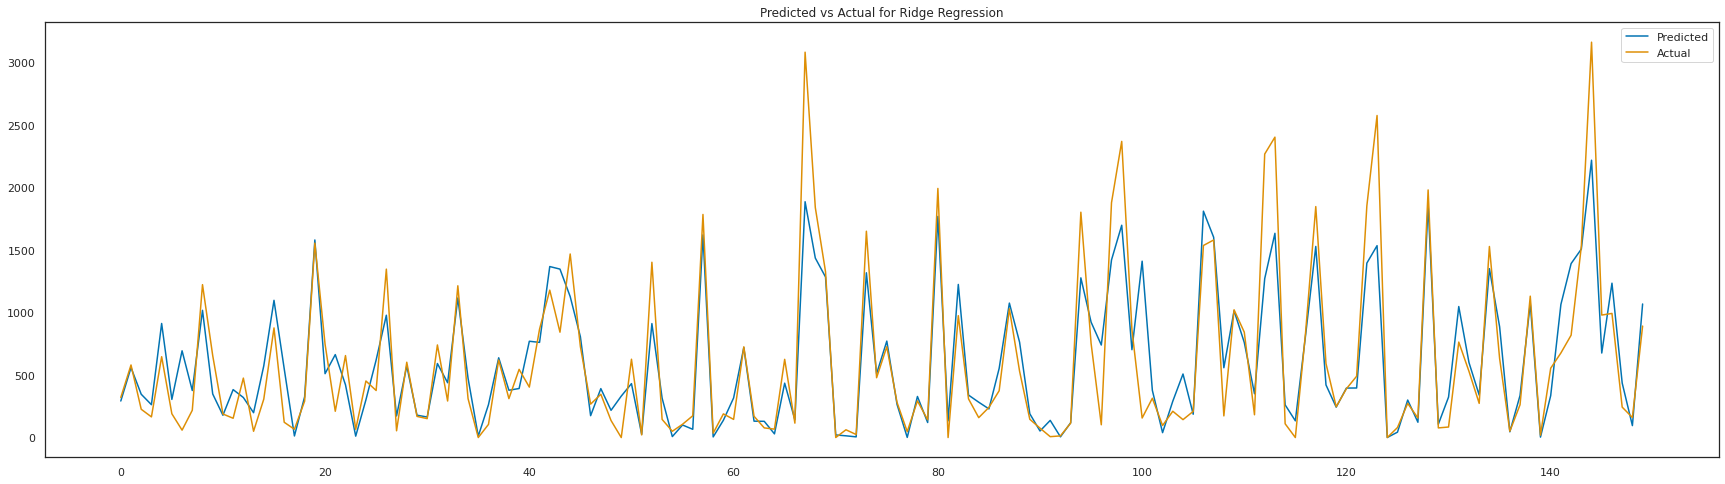

In [90]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Ridge Regression')
plt.show();

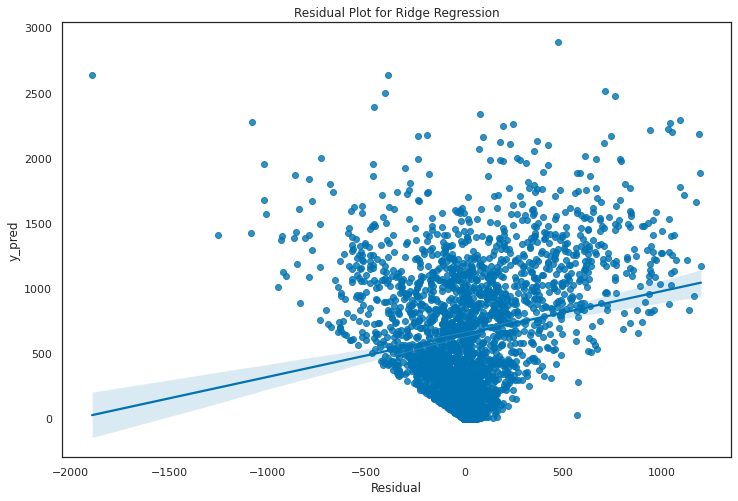

In [91]:
residual = y_test**2 - y_pred**2
plt.figure(figsize=(12,8))
sns.regplot(residual,y_pred**2)
plt.xlabel('Residual')
plt.ylabel('y_pred')
plt.title('Residual Plot for Ridge Regression')
plt.show();

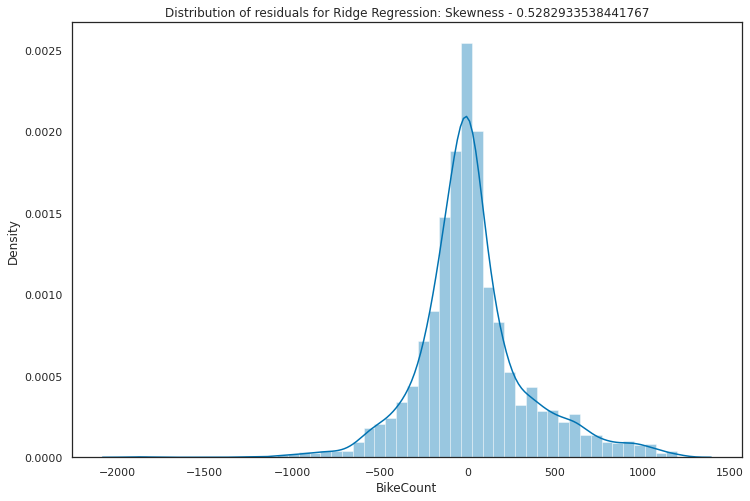

In [92]:
plt.figure(figsize=(12,8))
sns.distplot(residual)
plt.title('Distribution of residuals for Ridge Regression: Skewness - ' + str(residual.skew()))
plt.show();

In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict3={'Model':'Ridge Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict3,ignore_index=True)

The Ridge Regression model is no better than the other two models as it also fails to cover more than 75% of the variance.


### ML Model - 4 - **Implementing Elastic Net Model**


In [94]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -35.71663331130721


In [95]:
y_pred = elastic_regressor.predict(X_test)

In [96]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Ridge Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Ridge Regression with Hyperparameter tuning:
MSE : 98491.76242597908
RMSE : 313.8339727084674
R2 : 0.7585635222209248
Adjusted R2 :  0.7533046957893308


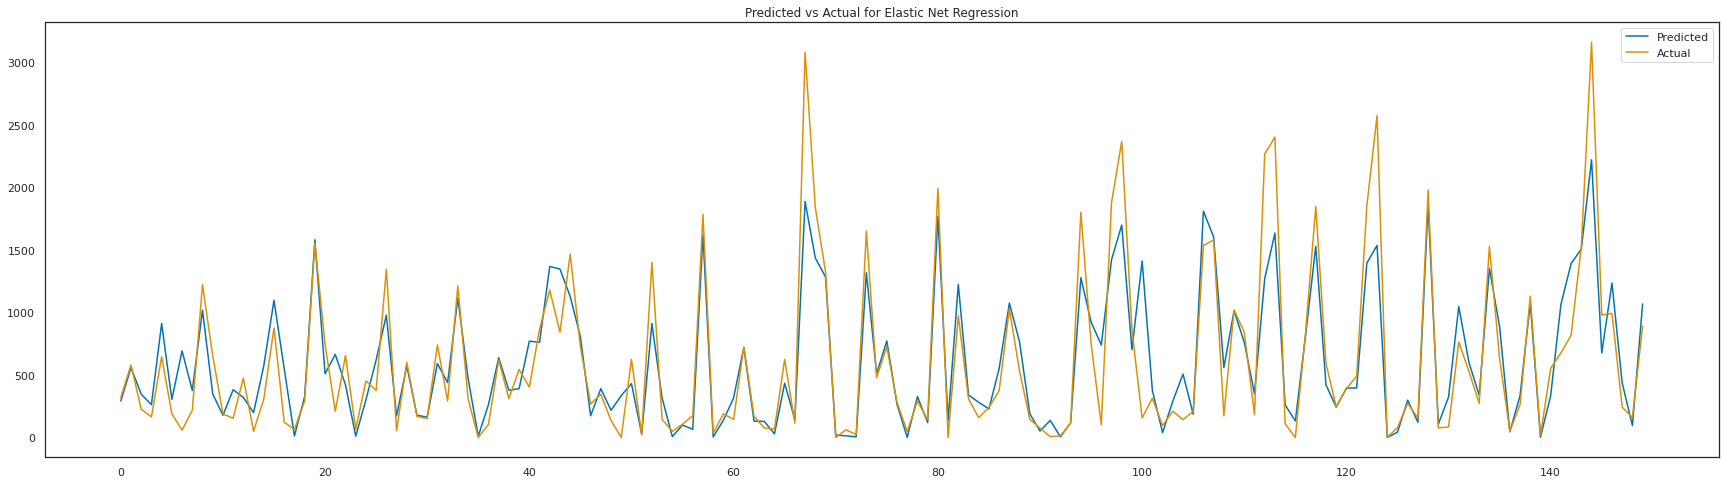

In [97]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Elastic Net Regression')
plt.show();

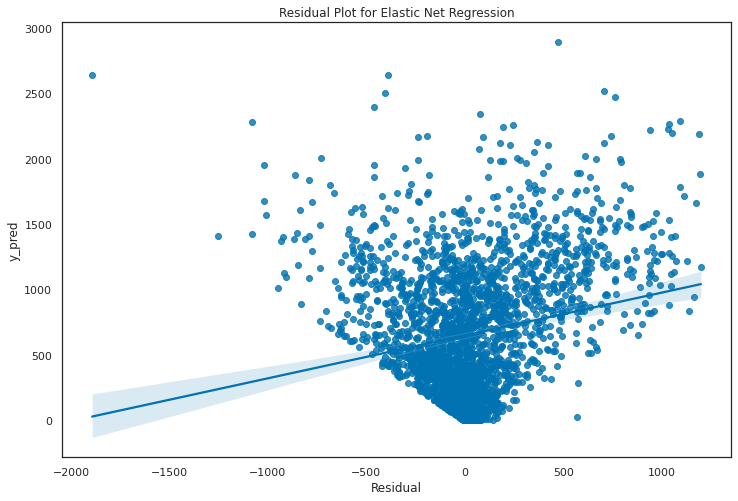

In [98]:
residual = y_test**2 - y_pred**2
plt.figure(figsize=(12,8))
sns.regplot(residual,y_pred**2)
plt.xlabel('Residual')
plt.ylabel('y_pred')
plt.title('Residual Plot for Elastic Net Regression')
plt.show();

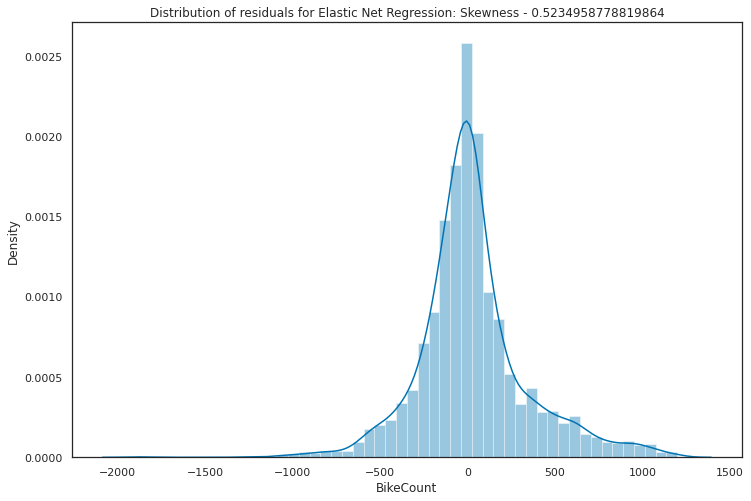

In [99]:
plt.figure(figsize=(12,8))
sns.distplot(residual)
plt.title('Distribution of residuals for Elastic Net Regression: Skewness - ' + str(residual.skew()))
plt.show();

In [100]:
# storing the test set metrics value in a dataframe for later comparison
dict4={'Model':'Elastic Net Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict4,ignore_index=True)

Elastic Net Regression is a combination of the Lasso and the Ridge Regressions. It is meant to bring the best of both the worlds. 

However, in our case, it is not giving us the desired results and our search for a model with better r2 score continues.

### ML Model - 5 - **Implementing Polynomial Model**


In [101]:
# Polynomial Regression with hyperparameter tuning
degrees = [2, 3] # Change degree "hyperparameter" here
best_score = 0
best_degree = 0
best_normalize = True
for degree in degrees:
  poly_features = PolynomialFeatures(degree = degree)
  X_train_poly = poly_features.fit_transform(X_train)
  polynomial_regressor = LinearRegression()
  polynomial_regressor.fit(X_train_poly, y_train)
  scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=3)
  if max(scores) > best_score:
    best_score = max(scores)
    best_degree = degree

LinearRegression()

LinearRegression()

In [102]:
print("Best degree: ", best_degree)
print("Best score: ", best_score)

Best degree:  2
Best score:  0.8662953524831636


In [103]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
best_polynomial_regressor = LinearRegression()
best_polynomial_regressor.fit(X_train_poly, y_train)
y_pred = best_polynomial_regressor.predict(X_test_poly)

LinearRegression()

In [104]:
best_polynomial_regressor.coef_

array([-1.16520832e+12, -1.85590442e+11,  1.11455002e+12, ...,
        5.73830462e+09,  0.00000000e+00, -7.70972961e+09])

In [105]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Polynomial Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test_poly.shape[0]-1)/(X_test_poly.shape[0]-X_test_poly.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Polynomial Regression with Hyperparameter tuning:
MSE : 45467.82217541845
RMSE : 213.2318507526923
R2 : 0.8885430561102152
Adjusted R2 :  0.6993866616032192


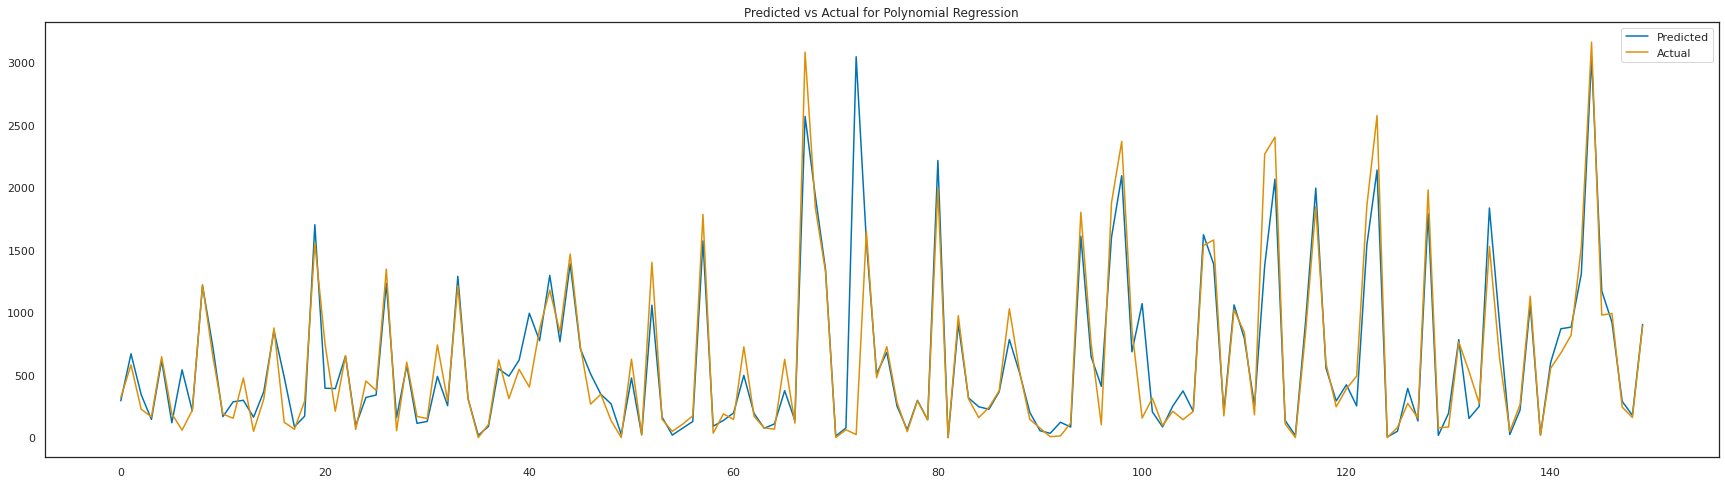

In [106]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Polynomial Regression')
plt.show();

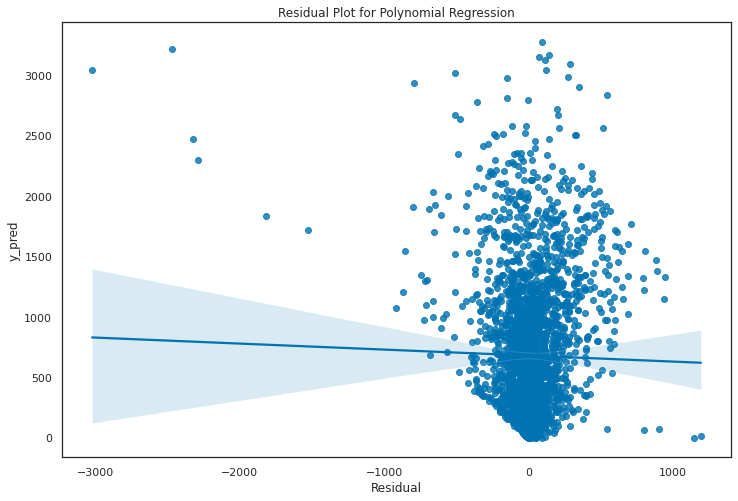

In [107]:
residual = y_test**2 - y_pred**2
plt.figure(figsize=(12,8))
sns.regplot(residual,y_pred**2)
plt.xlabel('Residual')
plt.ylabel('y_pred')
plt.title('Residual Plot for Polynomial Regression')
plt.show();

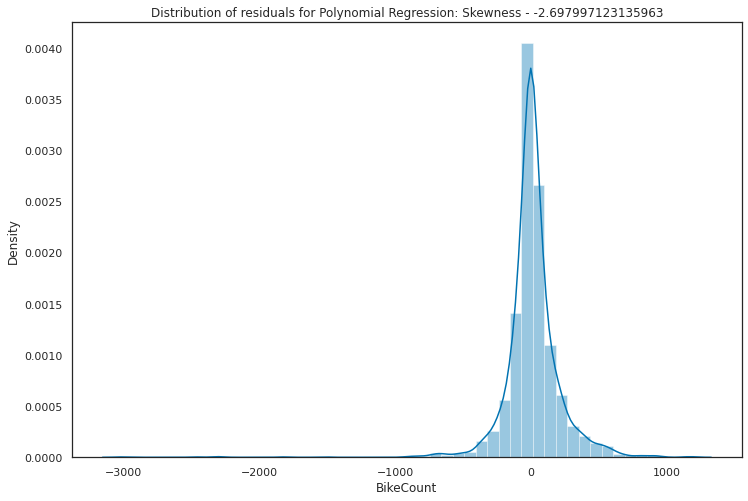

In [108]:
plt.figure(figsize=(12,8))
sns.distplot(residual)
plt.title('Distribution of residuals for Polynomial Regression: Skewness - ' + str(residual.skew()))
plt.show();

In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict5={'Model':'Polynomial Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict5,ignore_index=True)

Finally some breakthrough for us as Polynomial Regression gives us the variance coverage of an astonishing 89%.

For the uninitiated, Polynomial Regression is Linear Regression model build on top of Polynomial features with degrees more than 1.

Here, however, we have had to deal with a major issue. Our model has more than half of the number of datapoints it has in the test set. It is obviously not an ideal scenario and such models are hard to trust with for the best performances. Hence, we will keep looking for better performance now from tree-based regressor models.

### ML Model - 6 - **Implementing Decision Tree Model**


In [110]:
decision_regressor = DecisionTreeRegressor()
parameters={"max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[2,4,6,8,10],
           "min_weight_fraction_leaf":[0.1,0.3,0.5,0.7,0.9],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
decision = GridSearchCV(decision_regressor, parameters, cv=3)
decision.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,decision.best_params_)
print("\nUsing ",decision.best_params_, " the negative mean squared error is: ", decision.best_score_)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7, 0.9]})

The best fit alpha value is found out to be : {'max_depth': 11, 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1}

Using  {'max_depth': 11, 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1}  the negative mean squared error is:  0.3919480289642551


In [111]:
y_pred = decision.predict(X_test)

In [112]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Decision Tree Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Decision Tree Regression with Hyperparameter tuning:
MSE : 262295.86959311226
RMSE : 512.1482886753721
R2 : 0.35702449290462934
Adjusted R2 :  0.34301958104257535


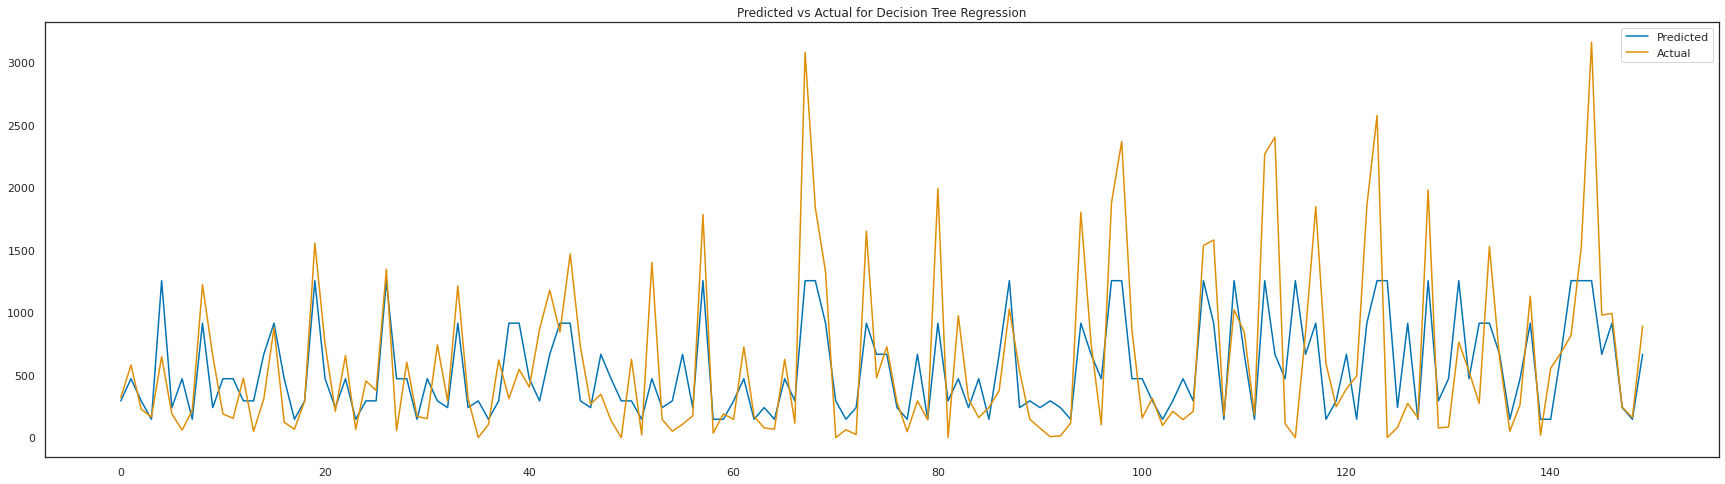

In [113]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Decision Tree Regression')
plt.show();

In [114]:
# storing the test set metrics value in a dataframe for later comparison
dict6={'Model':'Decision Tree Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict6,ignore_index=True)

Our first tree-based regressor is perhaps as bad as it could have gotten. We have an r2 score of just 0.357 and it definitely the worst model we will have of all the ones we try.

### ML Model - 7 - **Implementing Random Forest Model**


In [115]:
rf_regressor = RandomForestRegressor()
parameters = {'max_depth': [18, 20, 22],
              'min_samples_leaf': [6, 7, 8],
              'min_samples_split': [25, 30, 35],
              'n_estimators': [100, 110, 120]}
rf_model = GridSearchCV(rf_regressor, parameters, cv=3)
rf_model.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,rf_model.best_params_)
print("\nUsing ",rf_model.best_params_, " the negative mean squared error is: ", rf_model.best_score_)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 20, 22],
                         'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [25, 30, 35],
                         'n_estimators': [100, 110, 120]})

The best fit alpha value is found out to be : {'max_depth': 22, 'min_samples_leaf': 6, 'min_samples_split': 25, 'n_estimators': 120}

Using  {'max_depth': 22, 'min_samples_leaf': 6, 'min_samples_split': 25, 'n_estimators': 120}  the negative mean squared error is:  0.8815571015597707


In [116]:
y_pred = rf_model.predict(X_test)

In [117]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Random Forest Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Random Forest Regression with Hyperparameter tuning:
MSE : 52841.36876676834
RMSE : 229.87250546067563
R2 : 0.8704680103002334
Adjusted R2 :  0.8676466211819187


In [118]:
# storing the test set metrics value in a dataframe for later comparison
dict7={'Model':'Random Forest Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict7,ignore_index=True)

In [119]:
rf_optimal_model = RandomForestRegressor(max_depth = 22, min_samples_leaf = 6, min_samples_split = 25, n_estimators = 100)
rf_optimal_model.fit(X_train, y_train)
y_pred = rf_optimal_model.predict(X_test)

RandomForestRegressor(max_depth=22, min_samples_leaf=6, min_samples_split=25)

In [120]:
rf_optimal_model.score(X_train, y_train)

0.9282921251120353

In [121]:
rf_optimal_model.feature_importances_

array([3.20309474e-01, 1.67431102e-01, 4.01246781e-03, 5.74289135e-03,
       3.54318137e-02, 2.47150274e-02, 6.81200376e-04, 7.19594900e-04,
       1.70941698e-01, 3.15015832e-03, 4.56342422e-03, 1.20248093e-02,
       1.98080625e-02, 2.81523437e-02, 2.32832059e-02, 6.62442211e-03,
       1.76238664e-03, 9.68917403e-03, 1.92693393e-04, 2.04939047e-03,
       5.22911071e-04, 1.65938838e-05, 7.38517744e-06, 5.26277822e-05,
       7.81142693e-04, 3.71581464e-03, 1.06739685e-02, 3.24150767e-02,
       1.89902217e-02, 1.33668222e-02, 1.45311297e-02, 1.09069720e-02,
       4.15423305e-03, 1.61258565e-02, 1.97594491e-03, 4.42508885e-04,
       5.37060978e-03, 9.61086324e-05, 1.12228814e-04, 2.67265013e-03,
       6.52828377e-04, 8.89393443e-04, 1.80590878e-03, 5.51068457e-04,
       2.58781522e-03, 2.35868070e-04, 1.55559593e-03, 1.13980613e-03,
       7.88232210e-04, 5.96921172e-04, 2.59126587e-04, 3.72551068e-04,
       4.57973141e-04, 5.48791566e-04, 3.98626657e-03, 5.35570662e-03])

In [122]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("Final Gradient Boosting Model:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

Final Gradient Boosting Model:
MSE : 54110.50196348988
RMSE : 232.6166416305804
R2 : 0.8673569374419399
Adjusted R2 :  0.8644677847763422


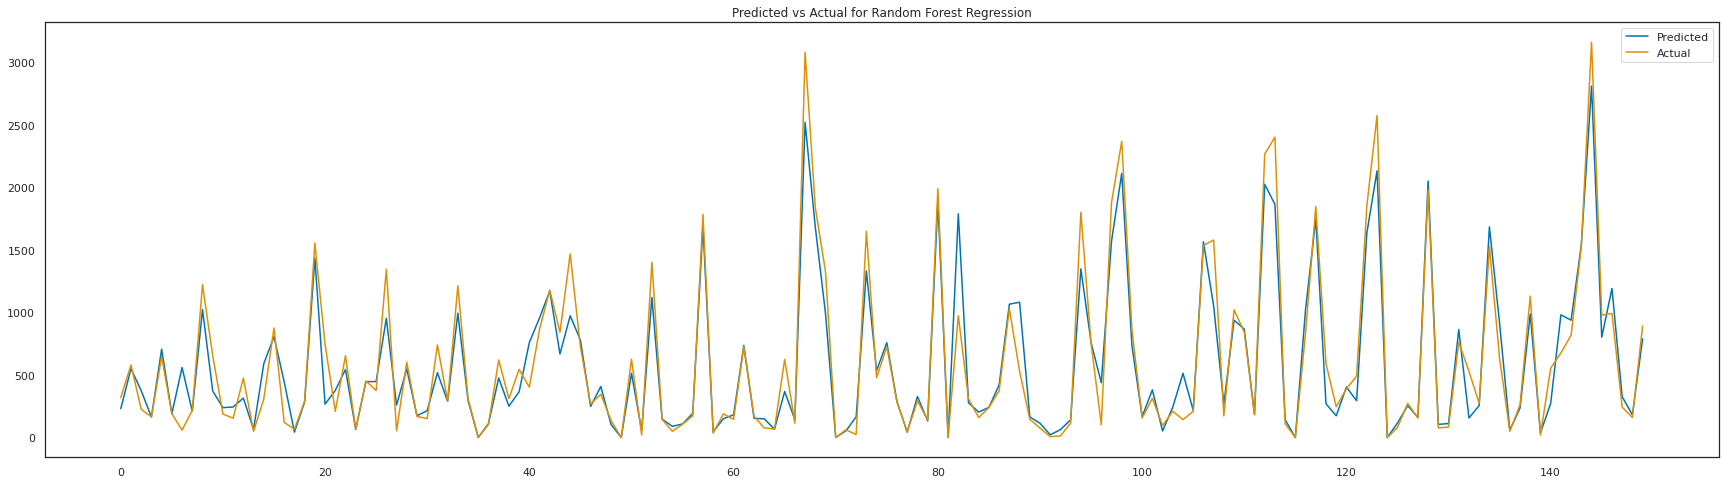

In [123]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Random Forest Regression')
plt.show();

Random Forest Regressor is one of the two ensemble method based algorithms I have decided to try. And the result for the Random Forest Model is very inspiring. We have gotten over the 92% mark for variance coverage of the training set and 87% for variance coverage of the test set.

This means that neither the model is overfitting, nor does it require 1500+ high degree independent variables for better predictive powers.

### ML Model - 8 - **Implementing Gradient Boosting Model**


In [124]:
gb_regressor = GradientBoostingRegressor()
parameters = {'max_depth': [13, 14, 15],
              'min_samples_leaf': [8, 9, 10],
              'min_samples_split': [55, 60, 65],
              'n_estimators': [110, 120, 130]}
gb_model = GridSearchCV(gb_regressor, parameters, cv=3)
gb_model.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,gb_model.best_params_)
print("\nUsing ",gb_model.best_params_, " the negative mean squared error is: ", gb_model.best_score_)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [13, 14, 15],
                         'min_samples_leaf': [8, 9, 10],
                         'min_samples_split': [55, 60, 65],
                         'n_estimators': [110, 120, 130]})

The best fit alpha value is found out to be : {'max_depth': 13, 'min_samples_leaf': 9, 'min_samples_split': 65, 'n_estimators': 130}

Using  {'max_depth': 13, 'min_samples_leaf': 9, 'min_samples_split': 65, 'n_estimators': 130}  the negative mean squared error is:  0.9359562342995408


In [125]:
y_pred = gb_model.predict(X_test)

In [126]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("For Gradient Boosting Regression with Hyperparameter tuning:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

For Gradient Boosting Regression with Hyperparameter tuning:
MSE : 28018.481481112663
RMSE : 167.3872201845549
R2 : 0.931317266389643
Adjusted R2 :  0.9298212597454656


In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict8={'Model':'Gradient Boosting Regression with HT',
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adj_r2),3)
       }
models = models.append(dict8,ignore_index=True)

In [128]:
gb_optimal_model = GradientBoostingRegressor(max_depth = 13, min_samples_leaf = 9, min_samples_split = 65, n_estimators = 130)
gb_optimal_model.fit(X_train, y_train)
y_pred = gb_optimal_model.predict(X_test)

GradientBoostingRegressor(max_depth=13, min_samples_leaf=9,
                          min_samples_split=65, n_estimators=130)

In [129]:
gb_optimal_model.score(X_train, y_train)

0.9865931824400312

In [130]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("Final Gradient Boosting Model:")
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", Adj_r2)

Final Gradient Boosting Model:
MSE : 28018.48148111267
RMSE : 167.38722018455493
R2 : 0.931317266389643
Adjusted R2 :  0.9298212597454656


In [131]:
gb_optimal_model.feature_importances_

array([2.99409612e-01, 1.54273298e-01, 5.97872783e-03, 8.03126649e-03,
       3.46485469e-02, 3.92925038e-02, 1.19798997e-03, 2.56672815e-03,
       1.58415088e-01, 2.82036857e-03, 4.01457212e-03, 1.02871838e-02,
       1.70996194e-02, 2.55634917e-02, 2.24985101e-02, 7.09652346e-03,
       5.42284579e-03, 1.43829067e-02, 8.69400219e-04, 3.15247910e-03,
       1.31928308e-03, 1.35995087e-04, 1.31737616e-04, 1.89077429e-04,
       7.96752736e-04, 3.10441090e-03, 1.02217520e-02, 3.21834445e-02,
       1.89547393e-02, 1.39610193e-02, 1.51093744e-02, 1.23992633e-02,
       4.73247809e-03, 1.66554366e-02, 2.34824558e-03, 4.72416143e-04,
       6.69699388e-03, 8.12949381e-05, 1.87980331e-04, 1.89911364e-03,
       8.21685448e-04, 2.61222337e-03, 2.26804873e-03, 9.73988800e-04,
       5.11477982e-03, 4.53022639e-04, 2.74174324e-03, 4.67108138e-04,
       1.02146855e-03, 1.48176043e-03, 4.81144182e-04, 8.09931972e-04,
       9.68480787e-04, 1.02668854e-03, 9.20130203e-03, 1.09541519e-02])

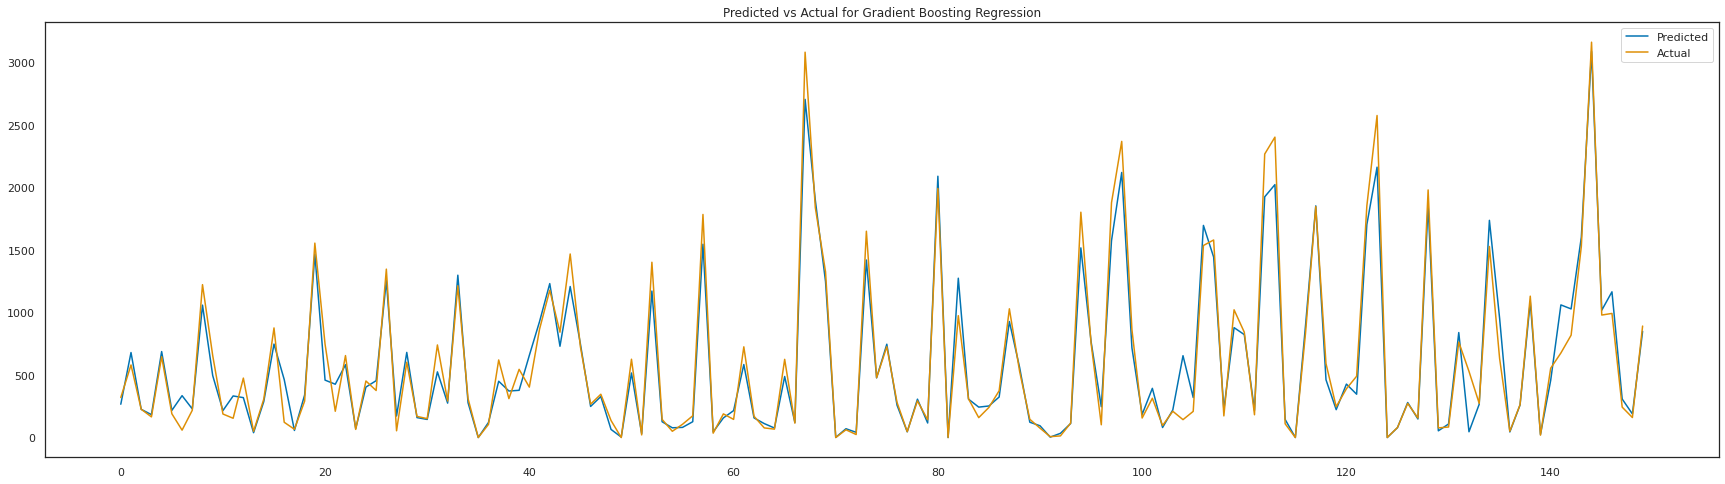

In [132]:
plt.figure(figsize=(30,8))
plt.plot((y_pred[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual for Gradient Boosting Regression')
plt.show();

The final model we prepared turns out to be our best model of the project with an r2 score of 0.93.

The Gradient Boosting Model has helped us cover and explain 93% of the variance of the target variable of the dataset, Rented Bike Count. And the model is overfitting as there a gap of only about 5% between the training set and test set prediction scores.

As for the feature importances for the model, we have Temperature, Humidity and Functioning Day as the three most important features for the Gradient Boosting Model.

## ***7. Conclusion***



* The Rented Bike Count variable is highly positively skewed. It measures 1.15 for skewness in the positive direction. It is fairly expected that the distribution of the target variable will be somewhat like it is i.e. a lot of volume for the smaller numbers and the volume keeps on decreasing as and when we move towards higher numbers.

* The months in the middle of the year have high bike rentals whereas they are far lesser at the beginning and at the end of the year. June has the highest bike rentals of all the months.

* The first two months saw a bit of dip in the number of bikes rented before we saw a consistent growth which peaked in the month of June before the drop until August. Since August, there was again a growth until October after which it started going down again.

* Also, the months of April, May, July, September, October and November experienced inconsistency in the number of the bikes rented on a day-to-day basis when compared with the rest of the months.

* Mondays and Wednesdays are the busiest whereas Sunday has the least requirement.

* The early morning hours have the lowest demands. However, after 07:00 hour, the demand grows and stays the same until 15:00 hour. Post 15:00, the demand grows at a rapid rate and see some of the busiest hours (16:00-22:00).

* Winter starts from December and goes on till February. Then comes the season of Spring. It is spread from the month of March till May. After Spring is the season of Summer. Summer is between the months of June and August. Finally, the months of September, October and November have the season of Autumn. Winter has very low requirements of bike sharing. Whereas, Summer has the highest. 

* The dataset has 365 days of data, a year. And from the 365 days, only 18 days (4.93%) were holidays.

* When it is a holiday, the bike rentals are very low, even during the supposed peak hours of the day during evening and night. 

* There were 353 functional days (96.71%) in the 365 days of the dataset. Functional days are when the bike sharing and rental options are available.

* The patterns of the bike rental counts when it snows is somewhat similar in shape and lower in volume to the one when it doesn't, without the massive growth experienced post noon. When it snows, the bike rentals stay somewhat close to 200 every hour.

* Rainfall seems to have the most say on the bike rental counts. When it rains, the bike rental counts stay below 200 throughout the 24-hour cycle.

* Solar Radiation is experienced only post 06:00 hour and before 20:00 hour. And it increases the bike rental counts to almost triple the numbers expected during a non-solar radiation timeline.

* A hyperparameter-tuned Gradient Boosting Regressor Algorithm works best for us as it has less than 5% difference between the training and test set predictive r2 scores and covers 93% of the total variance in the target variable. Features like Temperature, Humidity and some of the Hours had the highest importance of all.

* Due to the presence of a number of important categorical variables, linear models fail to do as well, except for when built on top of a high-degree polynomial features set. However, it is not advisable as the number of features are too high and the model thus is not a trustworthy one.

* Nowhere we encountered the problem of overfitting.



In [133]:
models

Model       MSE   RMSE  R2_score  \
0                     Linear regression  98385.80 313.67      0.76   
1              Lasso Regression with HT  98418.58 313.72      0.76   
2              Ridge Regression with HT  98623.82 314.04      0.76   
3        Elastic Net Regression with HT  98491.76 313.83      0.76   
4         Polynomial Regression with HT  45467.82 213.23      0.89   
5      Decision Tree Regression with HT 262295.87 512.15      0.36   
6      Random Forest Regression with HT  52841.37 229.87      0.87   
7  Gradient Boosting Regression with HT  28018.48 167.39      0.93   

   Adjusted R2  
0         0.75  
1         0.75  
2         0.75  
3         0.75  
4         0.70  
5         0.34  
6         0.87  
7         0.93

## ***8. Scope for improvements***

Even though we have tried to the best of our abilities, there is always a room for improvements.

We believe that the outliers could have been handled better, perhaps in a more elaborate technique. We could taken the usual boundaries for outliers instead of the extreme ones and tried our way with turning columns like rainfall and snowfall to see if that would have better the predictive power of the model.

That brings us to another possible place for improvement: feature engineering. As said earlier, we could have tried feature engineering on several columns that we didn’t and we could have even used some of the more advanced techniques which we didn’t.

Lastly, we could have tried to understand the relationships between the independent variables and target variable through hypothesis testing.
